In [ ]:
import numpy as np
import pandas as pd
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# download dataset using kagglehub
import kagglehub
import zipfile
import os

# Download latest version
dataset_path = kagglehub.dataset_download("meeraajayakumar/spotify-user-behavior-dataset")

print("Path to dataset files:", dataset_path)

# Check if the dataset file exists
excel_file = "Spotify_data.xlsx"
file_path = os.path.join(dataset_path, excel_file)

if os.path.exists(file_path):
    print(f"Excel file found: {file_path}")

    # Load the Excel file
    df = pd.read_excel(file_path)
else:
    print("Error: Excel file not found. Check the dataset directory.")

df.head()

100%|██████████| 48.1k/48.1k [00:00<00:00, 2.09MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/meeraajayakumar/spotify-user-behavior-dataset/versions/1
Excel file found: /root/.cache/kagglehub/datasets/meeraajayakumar/spotify-user-behavior-dataset/versions/1/Spotify_data.xlsx


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [ ]:
# alternative to save data
# import dataset to files and save it on df
# df = pd.read_excel("/content/Spotify_data.xlsx")
# df.head(100)

In [ ]:
df[["spotify_listening_device", "music_Influencial_mood"]][:5]

,spotify_listening_device,music_Influencial_mood
0,Smart speakers or voice assistants,Sadness or melancholy
1,Computer or laptop,Social gatherings or parties
2,Smart speakers or voice assistants,Relaxation and stress relief
3,"Smartphone, Smart speakers or voice assistants","Relaxation and stress relief, Social gathering..."
4,Smartphone,Relaxation and stress relief


In [ ]:
df_size = df.shape

print(f"Number of rows: {df_size[0]}")
print(f"Number of columns: {df_size[1]}")

Number of rows: 520
Number of columns: 20


In [ ]:
subscription_counts = df["spotify_subscription_plan"].value_counts()
print("Number of users in each subscription plan category:")
print(subscription_counts)

Number of users in each subscription plan category:
spotify_subscription_plan
Free (ad-supported)            424
Premium (paid subscription)     96
Name: count, dtype: int64


In [ ]:
missing_values_subscription = df["spotify_subscription_plan"].isnull().sum()

print(f"Missing values in spotify_subscription_plan column: {missing_values_subscription}")


Missing values in spotify_subscription_plan column: 0


<ipython-input-12-6b2bbaed964e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='music_recc_rating', y='spotify_subscription_plan', inner='box', palette='Dark2')


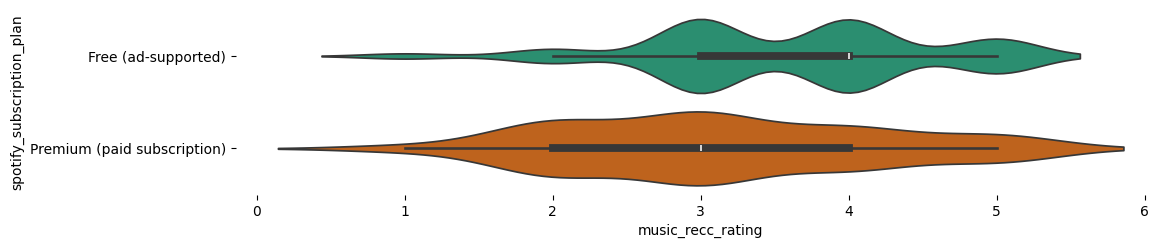

In [ ]:
# Set figure size dynamically based on the number of unique subscription plans
figsize = (12, 1.2 * len(df['spotify_subscription_plan'].unique()))
plt.figure(figsize=figsize)

# Create a violin plot for music_recc_rating vs spotify_subscription_plan
sns.violinplot(data=df, x='music_recc_rating', y='spotify_subscription_plan', inner='box', palette='Dark2')

# Remove top, right, bottom, and left spines for a cleaner plot
sns.despine(top=True, right=True, bottom=True, left=True)

# Show the plot
plt.show()


In [ ]:
stats = df.groupby('spotify_subscription_plan').agg(
    mean_rating=('music_recc_rating', 'mean'),
    median_rating=('music_recc_rating', 'median')
).reset_index()

def calculate_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

stats['mode_rating'] = df.groupby('spotify_subscription_plan')['music_recc_rating'].apply(calculate_mode).values

print(stats)

     spotify_subscription_plan  mean_rating  median_rating  mode_rating
0          Free (ad-supported)     3.584906            4.0            3
1  Premium (paid subscription)     3.145833            3.0            3


In [ ]:
missing_values = df["music_recc_rating"].isnull().sum()
print(f"Missing values for music recommendation columns: {missing_values}")

Missing values for music recommendation columns: 0


In [ ]:
age_counts_table = df.groupby(['spotify_subscription_plan', 'Age']).size().unstack(fill_value=0)
print(age_counts_table)

Age                          12-20  20-35  35-60  6-12  60+
spotify_subscription_plan                                  
Free (ad-supported)             49    356     17     1    1
Premium (paid subscription)     22     66      6     2    0


In [ ]:
valid_ages = ["6-12", "12-20", "20-35", "35-60", "60+"]
invalid_age_count = df[~df["Age"].isin(valid_ages)].shape[0]
print(f"Number of invalid age values: {invalid_age_count}")

Number of invalid age values: 0


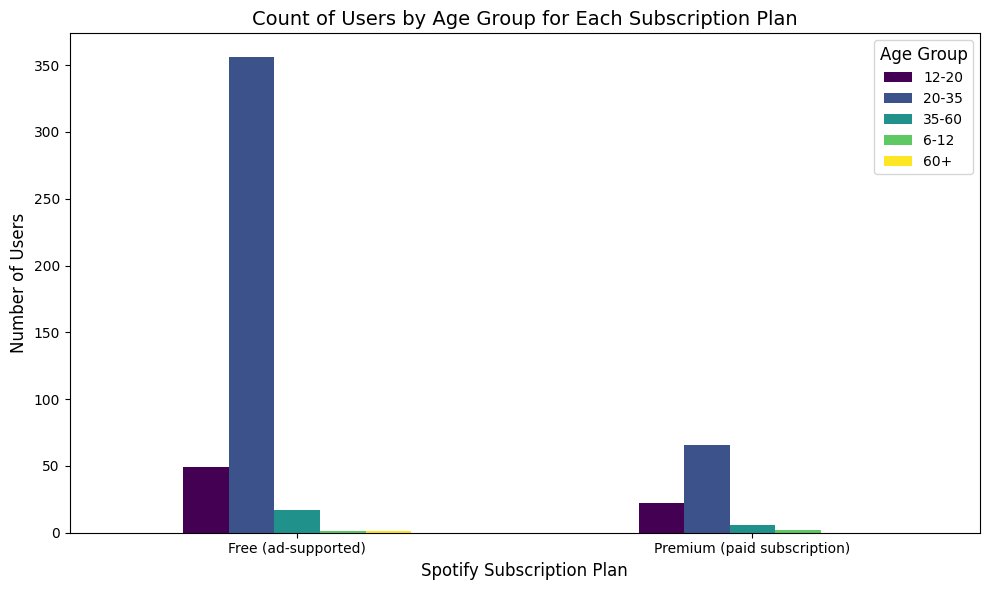

In [ ]:
import matplotlib.pyplot as plt
age_counts = df.groupby(['spotify_subscription_plan', 'Age']).size().unstack(fill_value=0)

age_counts.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Count of Users by Age Group for Each Subscription Plan', fontsize=14)
plt.xlabel('Spotify Subscription Plan', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Age Group', fontsize=10, title_fontsize=12)
plt.tight_layout()

plt.show()

In [ ]:
usage_counts_table = df.groupby(['spotify_subscription_plan', 'spotify_usage_period']).size().unstack(fill_value=0)

print(usage_counts_table)

spotify_usage_period         1 year to 2 years  6 months to 1 year  \
spotify_subscription_plan                                            
Free (ad-supported)                        110                  92   
Premium (paid subscription)                 31                  27   

spotify_usage_period         Less than 6 months  More than 2 years  
spotify_subscription_plan                                           
Free (ad-supported)                          84                138  
Premium (paid subscription)                   7                 31  


In [ ]:
valid_periods = ["Less than 6 months", "6 months to 1 year", "1 year to 2 years", "More than 2 years"]
invalid_count = df[~df["spotify_usage_period"].isin(valid_periods)].shape[0]
print(invalid_count)

0


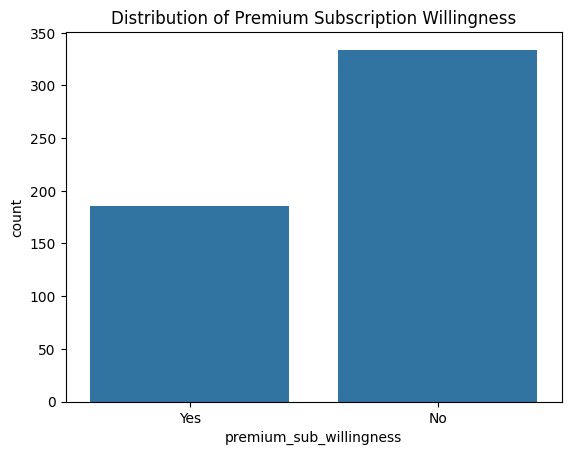

In [ ]:
sns.countplot(x='premium_sub_willingness', data=df)
plt.title('Distribution of Premium Subscription Willingness')
plt.show()


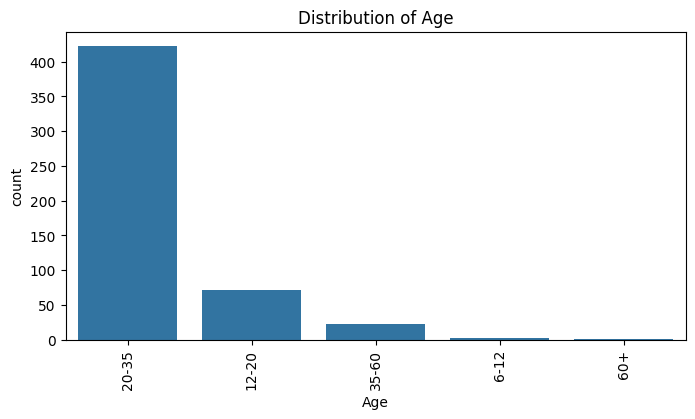

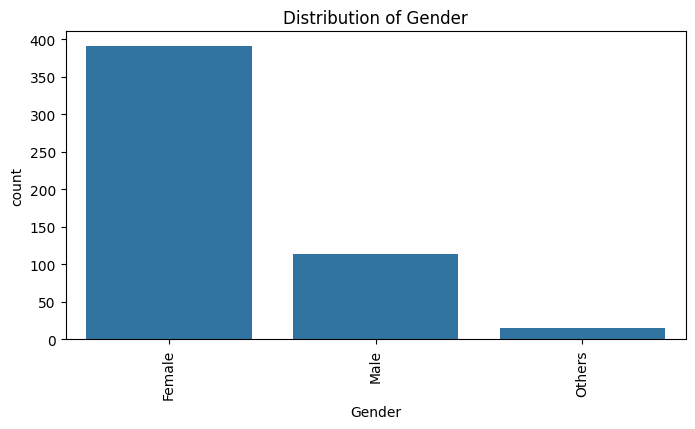

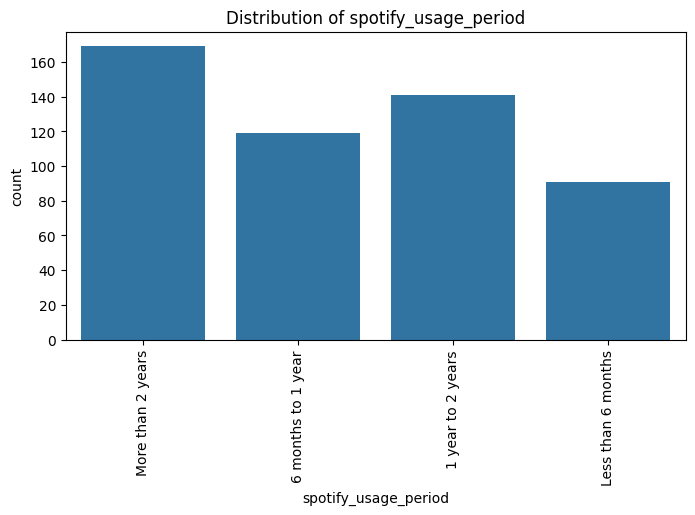

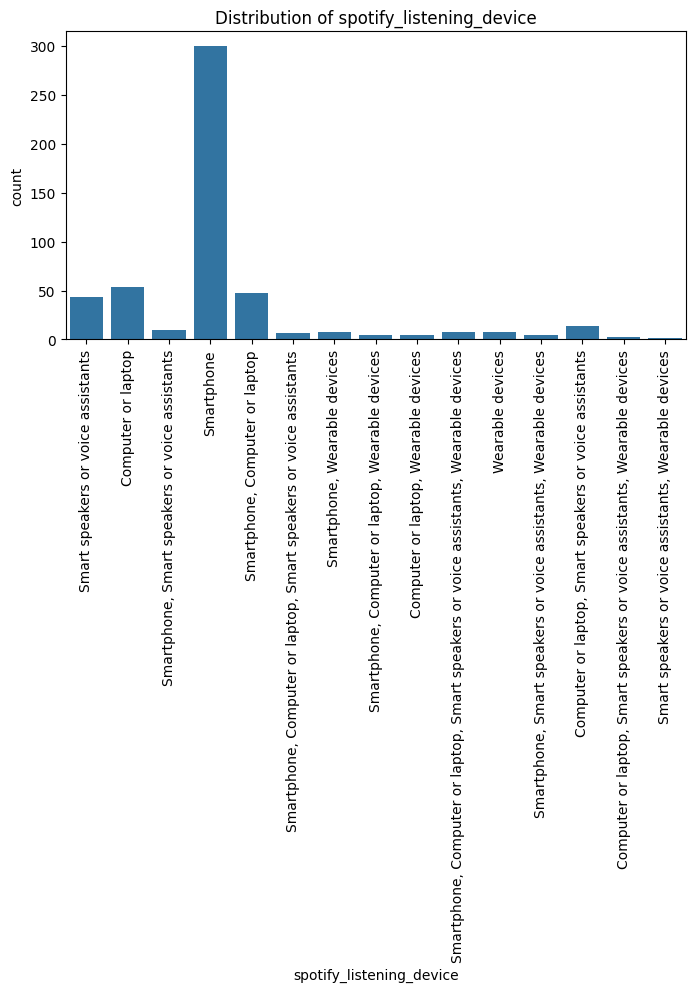

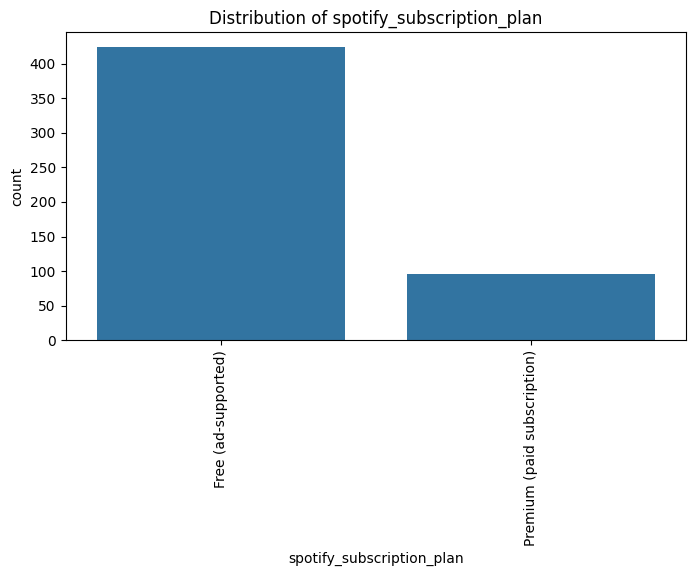

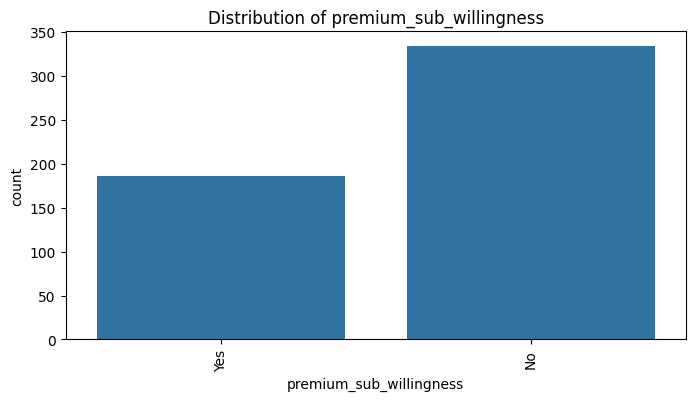

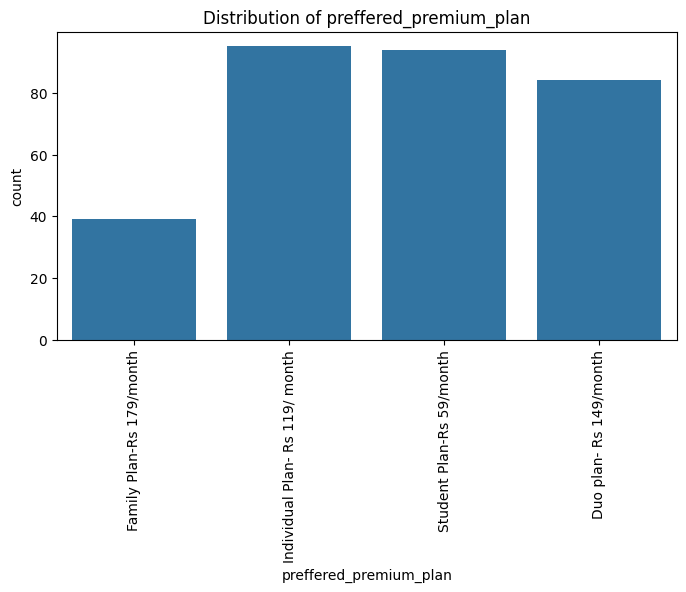

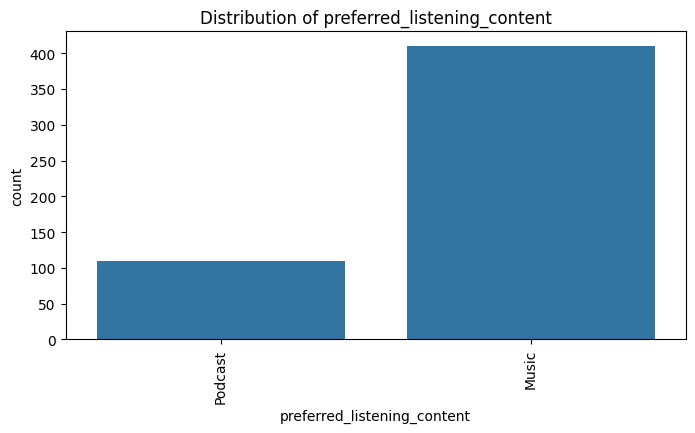

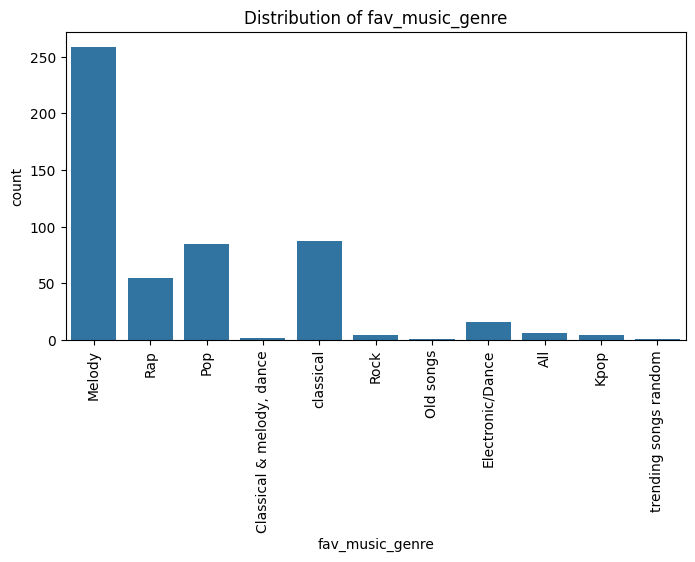

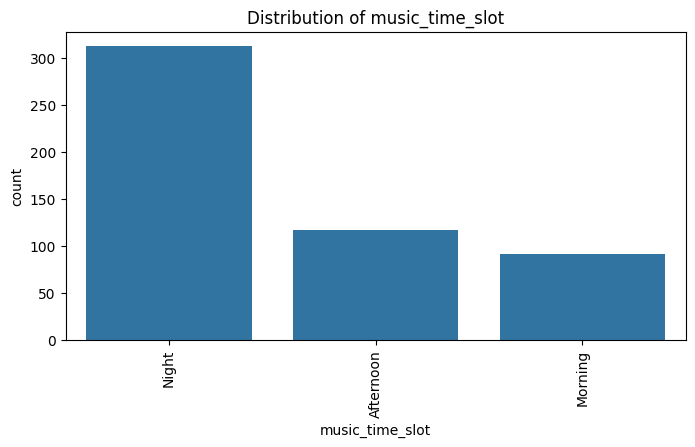

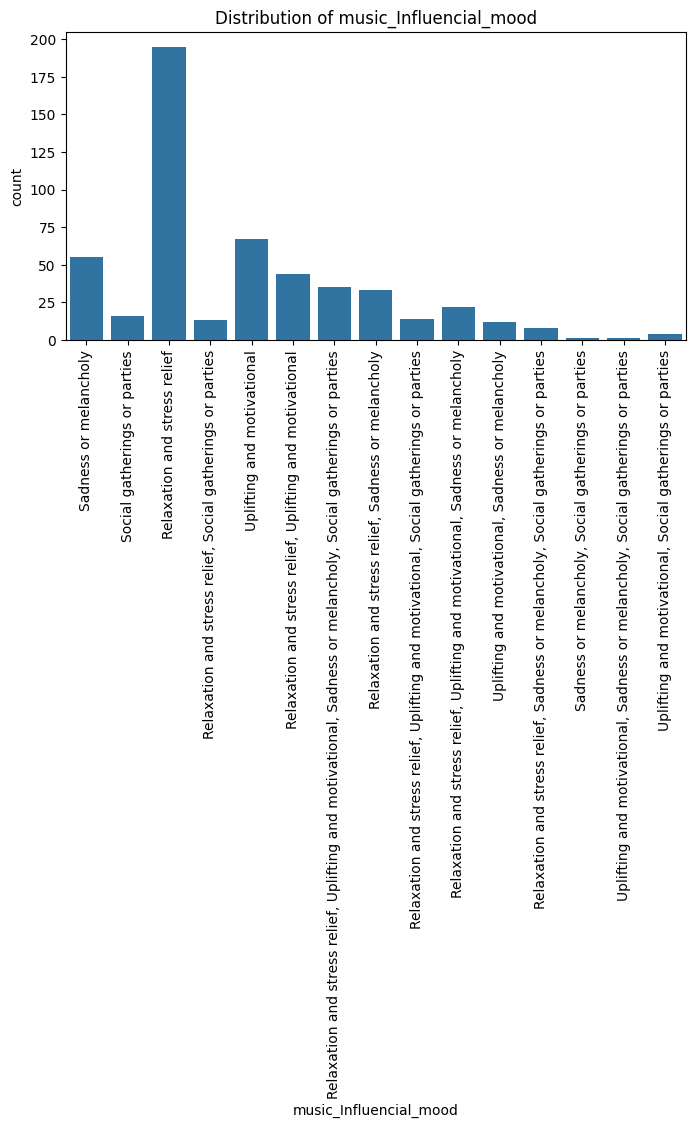

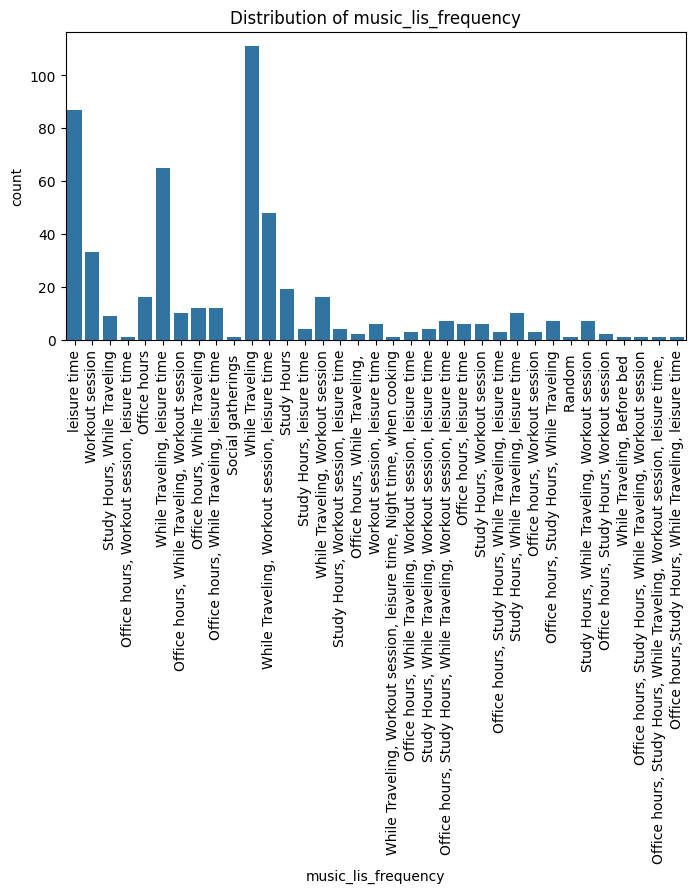

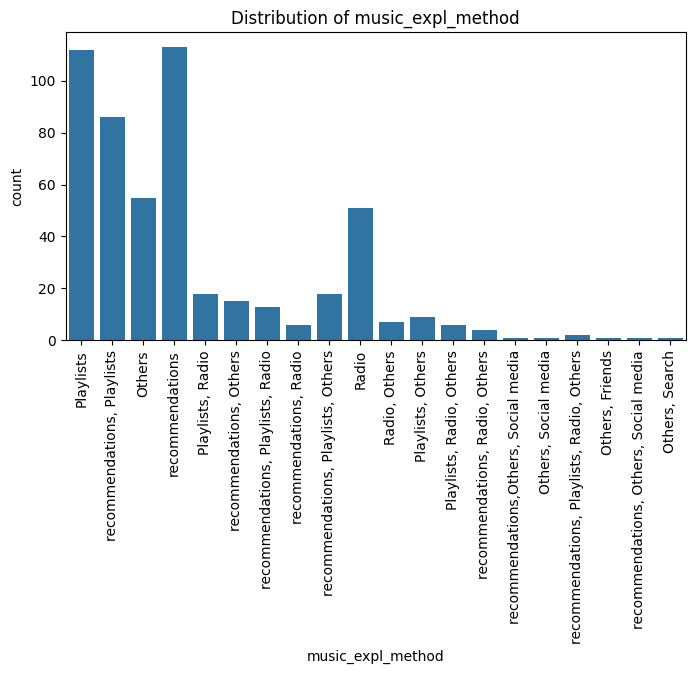

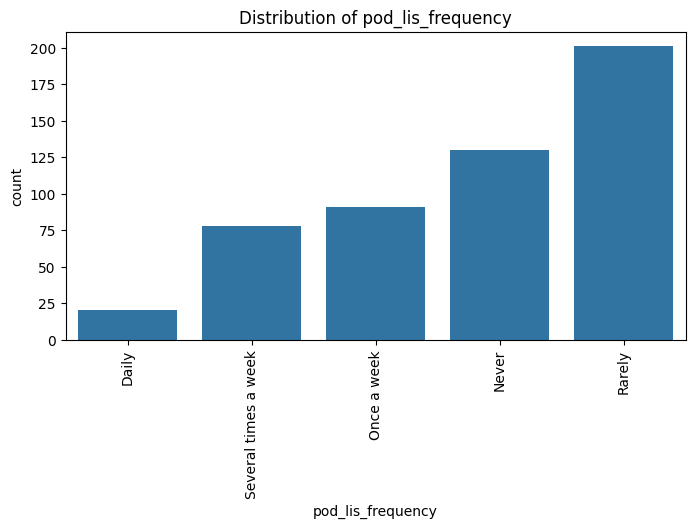

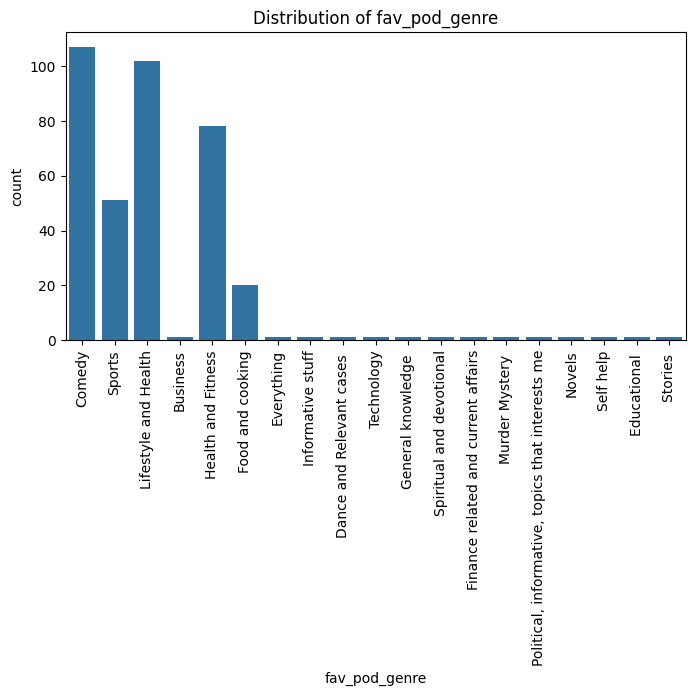

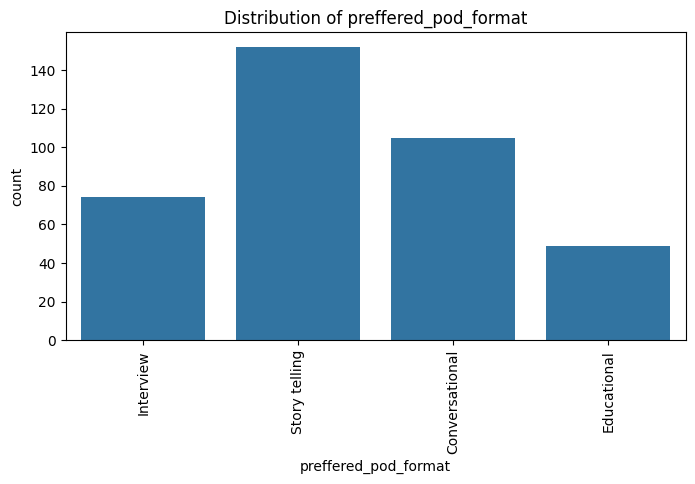

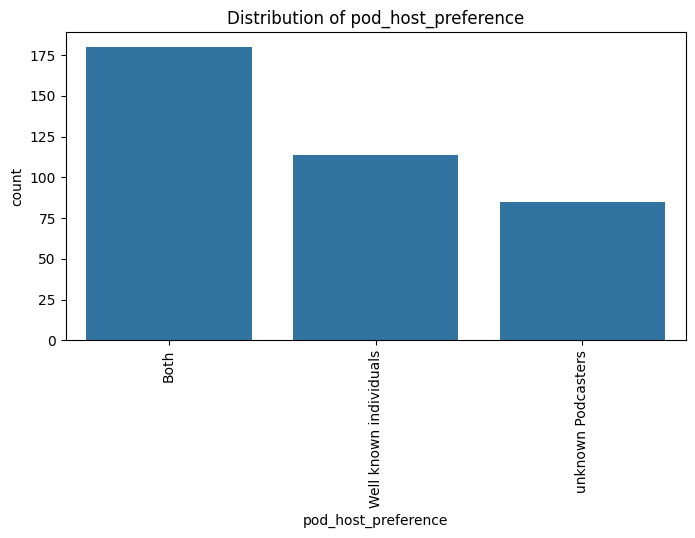

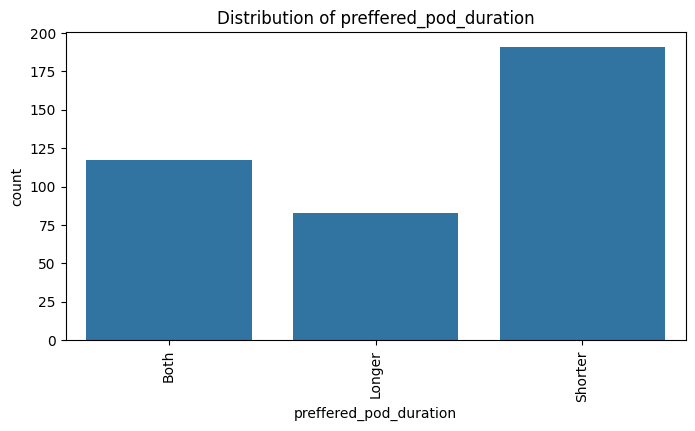

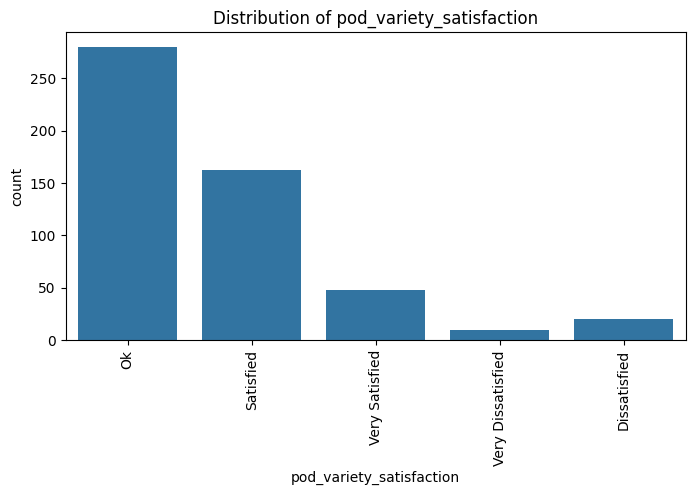

In [ ]:
# Bar plots for categorical features
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()


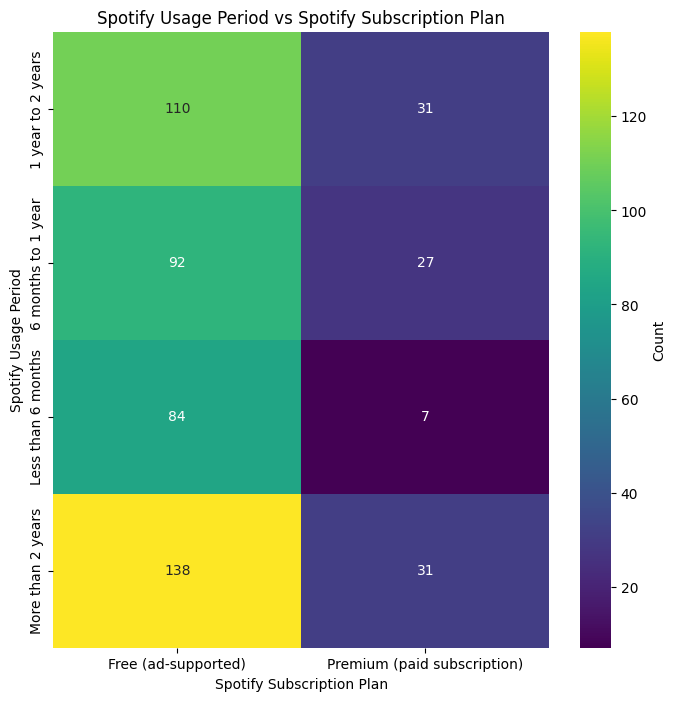

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Group the data by 'spotify_usage_period' and calculate the value counts of 'spotify_subscription_plan'
df_2dhist = df.groupby('spotify_usage_period')['spotify_subscription_plan'].value_counts().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Count'})

# Add labels and title
plt.xlabel('Spotify Subscription Plan')
plt.ylabel('Spotify Usage Period')
plt.title('Spotify Usage Period vs Spotify Subscription Plan')

plt.show()


In [ ]:
# @title is_premium

# from matplotlib import pyplot as plt
# df['is_premium'].plot(kind='hist', bins=20, title='is_premium')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(df.columns)

Index(['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preffered_premium_plan', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_Influencial_mood',
       'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
       'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
       'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')


In [ ]:
# Handle Missing Values
# Fill missing values in categorical columns with "Unknown" and numerical columns with their median
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna("Unknown")

# Feature Engineering
# Simplify Age Groups
df['Age_Group'] = df['Age'].apply(lambda x: '12-20' if '12-20' in x else ('20-35' if '20-35' in x else '35-60'))

# Create a binary variable for Premium Subscription
df['is_premium'] = df['spotify_subscription_plan'].apply(lambda x: 1 if 'Premium' in x else 0)

# Convert Listening Frequency to Numeric Scale
frequency_mapping = {
    "Never": 0,
    "Rarely": 1,
    "Once a week": 2,
    "Several times a week": 3,
    "Daily": 4
}
df['pod_lis_frequency_num'] = df['pod_lis_frequency'].map(frequency_mapping)

# Encode Categorical Features with One-Hot Encoding
df = pd.get_dummies(df, columns=['Gender', 'spotify_usage_period', 'premium_sub_willingness', 'spotify_subscription_plan', 'preffered_premium_plan',
                                 'preferred_listening_content', 'music_time_slot', 'fav_music_genre'], drop_first=True)

In [ ]:
# Split the text by commas and convert each phrase to lowercase
df['music_Influencial_mood_list'] = df['music_Influencial_mood'].apply(
    lambda x: [phrase.strip().lower() for phrase in x.split(',') if phrase.strip()]
)

# Add the prefix 'music_influencial_mood_' and replace spaces with underscores for each word/phrase
df['music_Influencial_mood_list'] = df['music_Influencial_mood_list'].apply(
    lambda x: ['music_influencial_mood_' + phrase.replace(' ', '_') for phrase in x]
)

# Get all unique words/phrases after adding the prefix
all_words = set([word for mood_list in df['music_Influencial_mood_list'] for word in mood_list])

# One-hot encoding: Create a column for each word/phrase
for word in all_words:
    df[word] = df['music_Influencial_mood_list'].apply(lambda x: True if word in x else False)

# drop the original columns if no longer needed
df.drop(columns=['music_Influencial_mood', 'music_Influencial_mood_list'], inplace = True)

In [ ]:
df.columns

Index(['Age', 'spotify_listening_device', 'music_lis_frequency',
       'music_expl_method', 'music_recc_rating', 'pod_lis_frequency',
       'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference',
       'preffered_pod_duration', 'pod_variety_satisfaction', 'Age_Group',
       'is_premium', 'pod_lis_frequency_num', 'Gender_Male', 'Gender_Others',
       'spotify_usage_period_6 months to 1 year',
       'spotify_usage_period_Less than 6 months',
       'spotify_usage_period_More than 2 years', 'premium_sub_willingness_Yes',
       'spotify_subscription_plan_Premium (paid subscription)',
       'preffered_premium_plan_Family Plan-Rs 179/month',
       'preffered_premium_plan_Individual Plan- Rs 119/ month',
       'preffered_premium_plan_Student Plan-Rs 59/month',
       'preffered_premium_plan_Unknown', 'preferred_listening_content_Podcast',
       'music_time_slot_Morning', 'music_time_slot_Night',
       'fav_music_genre_Classical & melody, dance',
       'fav_music_genre_Ele

In [ ]:
# Handle missing values in the 'spotify_listening_device' column
df['spotify_listening_device'] = df['spotify_listening_device'].fillna('Unknown')

# Split the text in 'spotify_listening_device' by commas and convert each phrase to lowercase
df['spotify_listening_device_list'] = df['spotify_listening_device'].apply(
    lambda x: [f"spotify_listening_device_{device.strip().lower().replace(' ', '_')}" for device in x.split(',')]  # Add prefix and replace spaces with "_"
)

# Get all unique devices
all_devices = set([device for device_list in df['spotify_listening_device_list'] for device in device_list])

# One-hot encoding: Create a column for each device
for device in all_devices:
    df[device] = df['spotify_listening_device_list'].apply(lambda x: True if device in x else False)

# drop the original columns if no longer needed
df = df.drop(columns=['spotify_listening_device', 'spotify_listening_device_list'])

df.columns = [col.lower().replace(" ", "_") for col in df.columns]


In [ ]:
# Split the 'music_lis_frequency' column into lists based on commas
df['music_lis_frequency_list'] = df['music_lis_frequency'].apply(
    lambda x: [item.strip().lower().replace(" ", "_") for item in str(x).split(',')] if isinstance(x, str) else []
)

# Perform one-hot encoding on the 'music_lis_frequency_list' column
music_lis_frequency_flat = df['music_lis_frequency_list'].explode().unique()

for word in music_lis_frequency_flat:
    df[f"music_lis_frequency_{word}"] = df['music_lis_frequency_list'].apply(
        lambda x: True if word in x else False
    )

# Drop the 'music_lis_frequency_list' column (optional, as it's not needed anymore)
df.drop('music_lis_frequency_list', axis=1, inplace=True)
df.drop('music_lis_frequency', axis=1, inplace=True)

# View the updated DataFrame with one-hot encoded columns for 'music_lis_frequency'
df.head()


,age,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction,age_group,...,music_lis_frequency_workout_session,music_lis_frequency_study_hours,music_lis_frequency_while_traveling,music_lis_frequency_office_hours,music_lis_frequency_social_gatherings,music_lis_frequency_,music_lis_frequency_night_time,music_lis_frequency_when_cooking,music_lis_frequency_random,music_lis_frequency_before_bed
0,20-35,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok,20-35,...,False,False,False,False,False,False,False,False,False,False
1,12-20,Playlists,2,Several times a week,Comedy,Interview,Both,Unknown,Satisfied,12-20,...,True,False,False,False,False,False,False,False,False,False
2,35-60,Playlists,4,Once a week,Sports,Interview,Unknown,Both,Satisfied,35-60,...,False,True,True,False,False,False,False,False,False,False
3,20-35,"recommendations, Playlists",4,Never,Unknown,Unknown,Unknown,Unknown,Ok,20-35,...,True,False,False,True,False,False,False,False,False,False
4,20-35,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok,20-35,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.head()

,age,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction,age_group,...,music_lis_frequency_workout_session,music_lis_frequency_study_hours,music_lis_frequency_while_traveling,music_lis_frequency_office_hours,music_lis_frequency_social_gatherings,music_lis_frequency_,music_lis_frequency_night_time,music_lis_frequency_when_cooking,music_lis_frequency_random,music_lis_frequency_before_bed
0,20-35,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok,20-35,...,False,False,False,False,False,False,False,False,False,False
1,12-20,Playlists,2,Several times a week,Comedy,Interview,Both,Unknown,Satisfied,12-20,...,True,False,False,False,False,False,False,False,False,False
2,35-60,Playlists,4,Once a week,Sports,Interview,Unknown,Both,Satisfied,35-60,...,False,True,True,False,False,False,False,False,False,False
3,20-35,"recommendations, Playlists",4,Never,Unknown,Unknown,Unknown,Unknown,Ok,20-35,...,True,False,False,True,False,False,False,False,False,False
4,20-35,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok,20-35,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
filtered_columns = [col for col in df.columns if col.startswith('spotify_listening_device')]
filtered_columns
df[filtered_columns][:5]

,spotify_listening_device_smartphone,spotify_listening_device_wearable_devices,spotify_listening_device_smart_speakers_or_voice_assistants,spotify_listening_device_computer_or_laptop
0,False,False,True,False
1,False,False,False,True
2,False,False,True,False
3,True,False,True,False
4,True,False,False,False


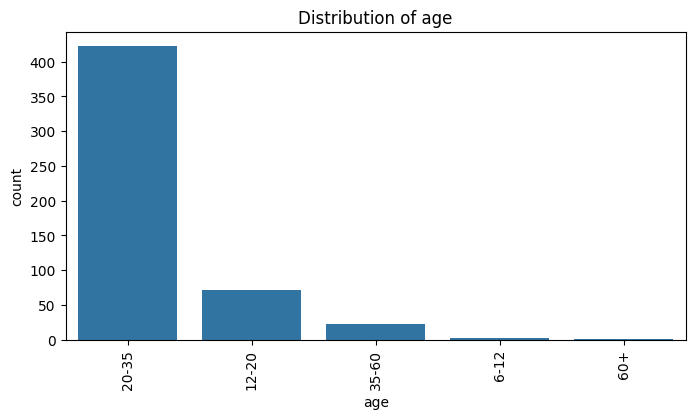

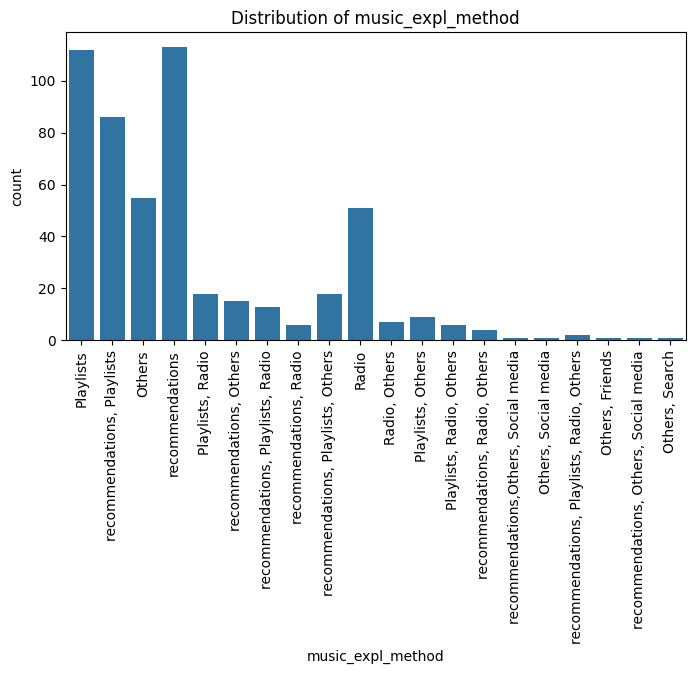

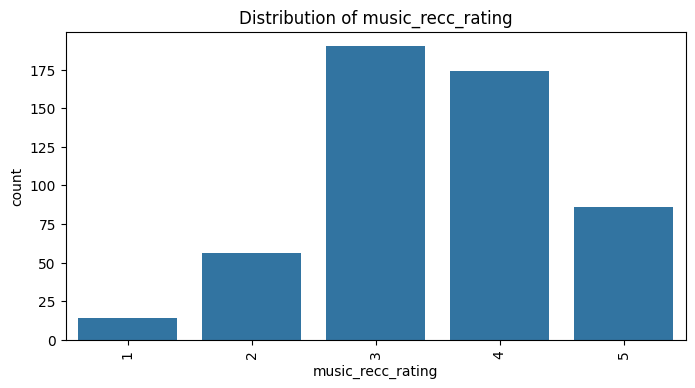

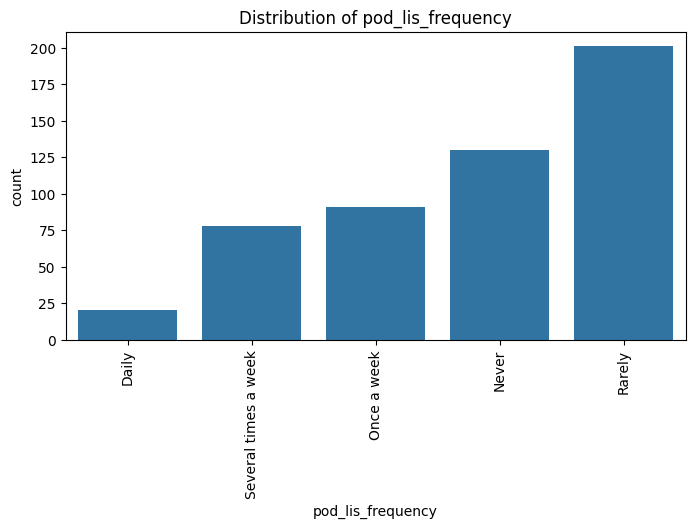

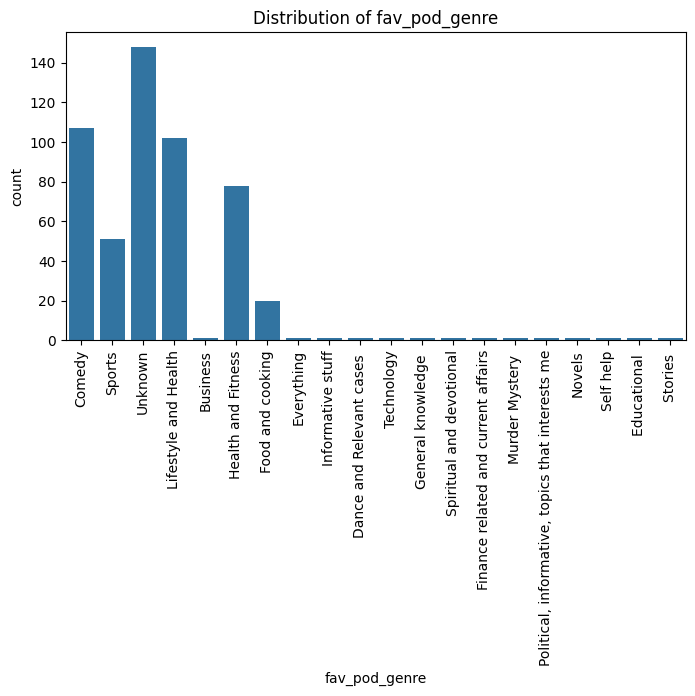

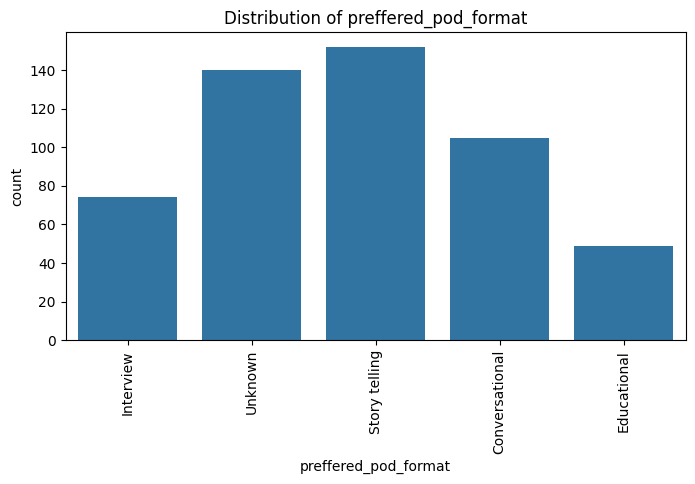

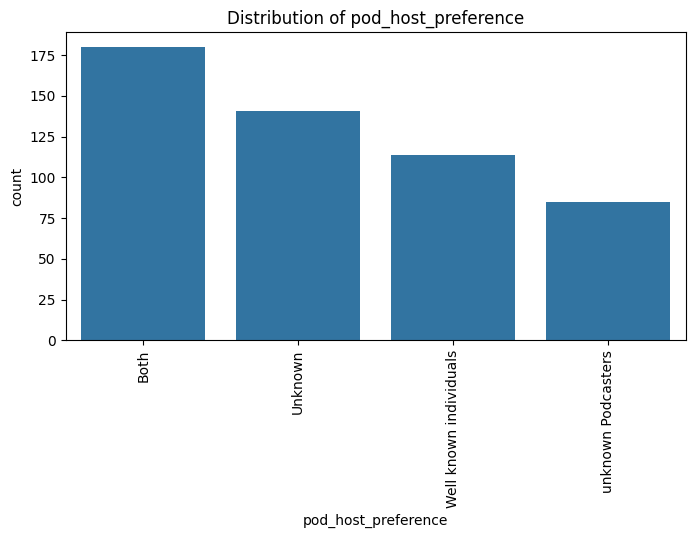

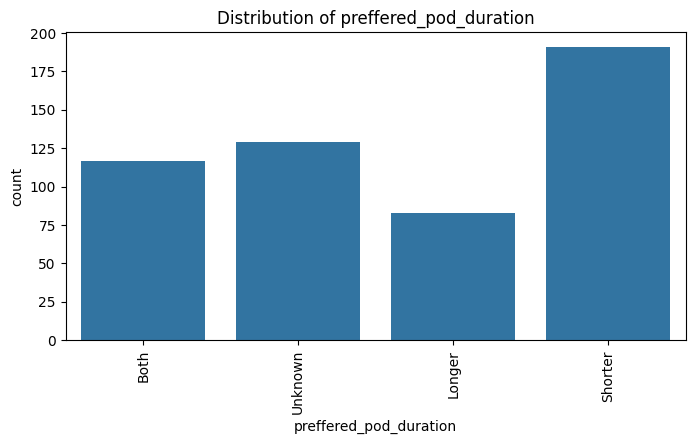

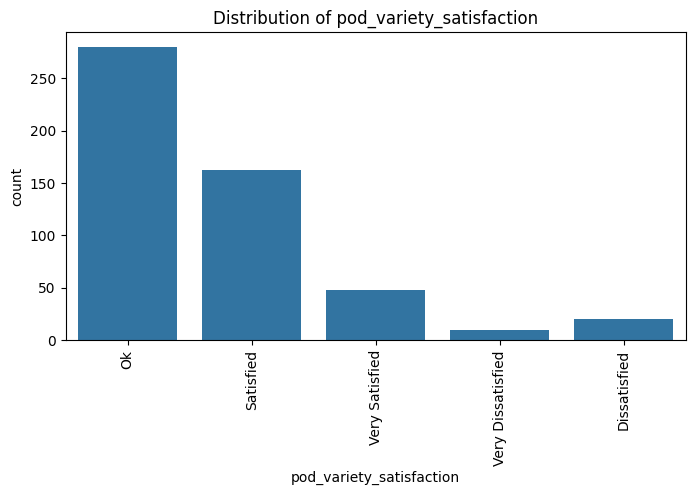

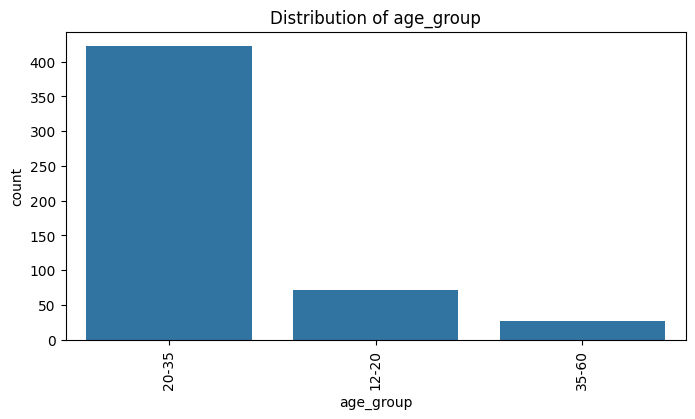

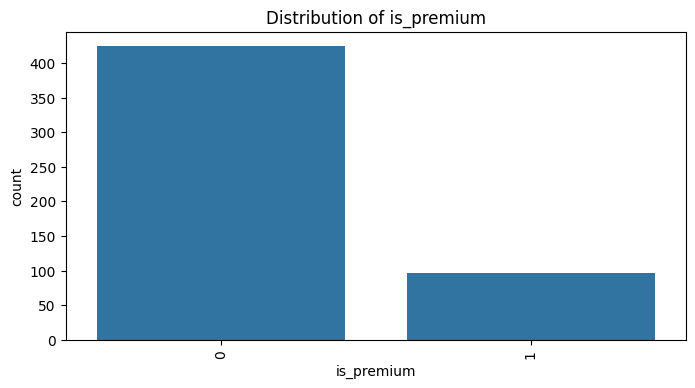

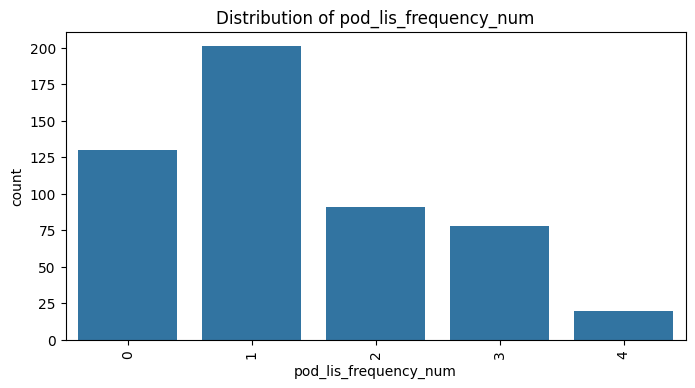

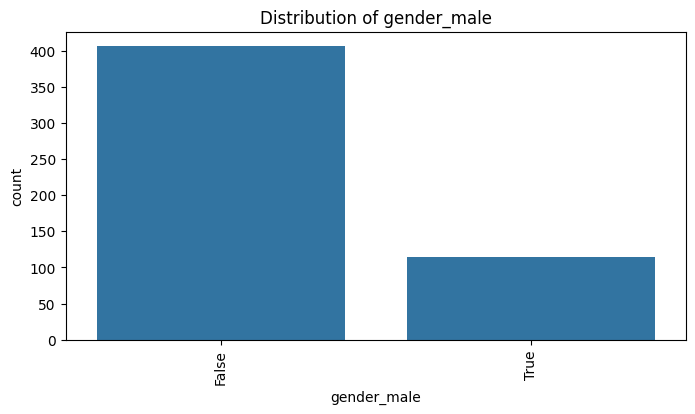

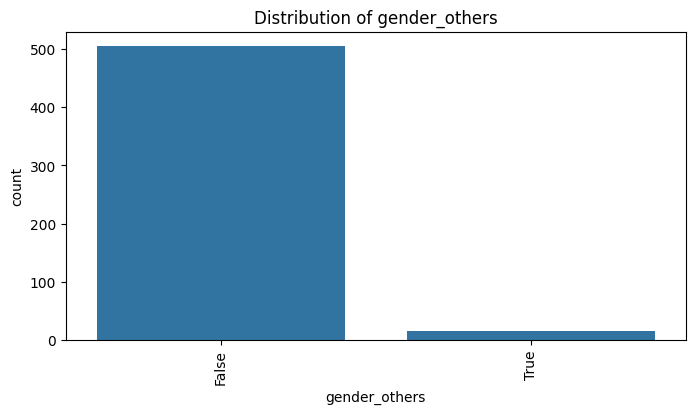

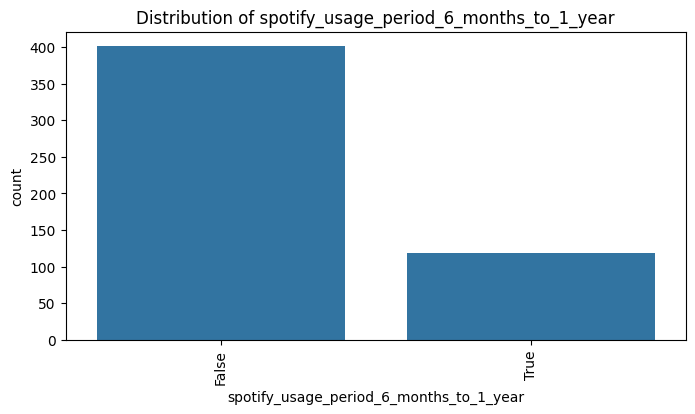

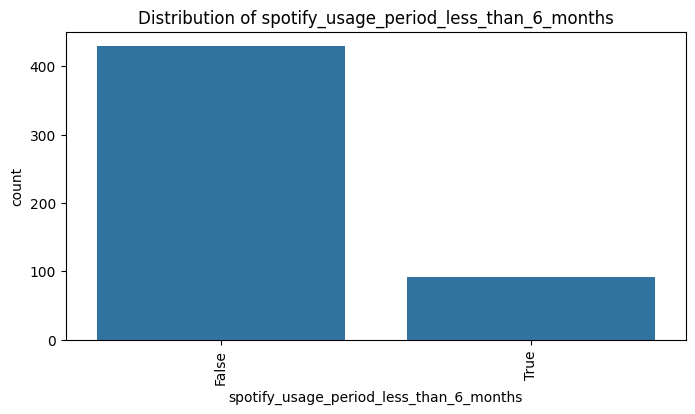

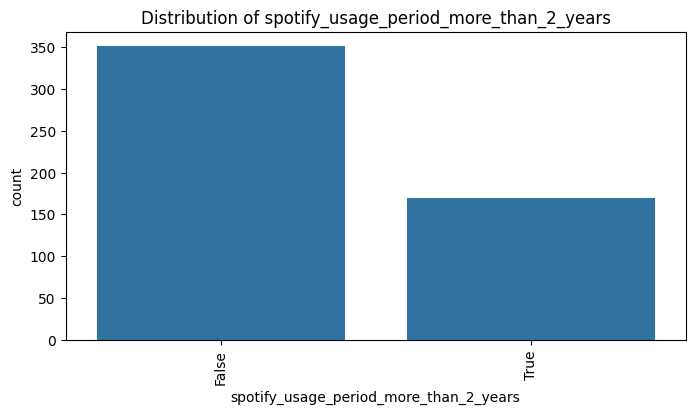

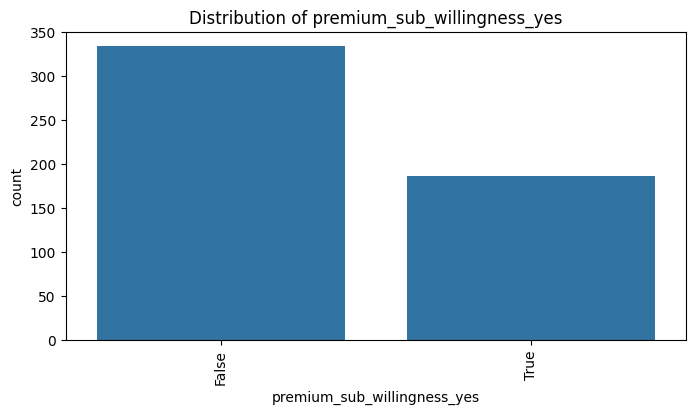

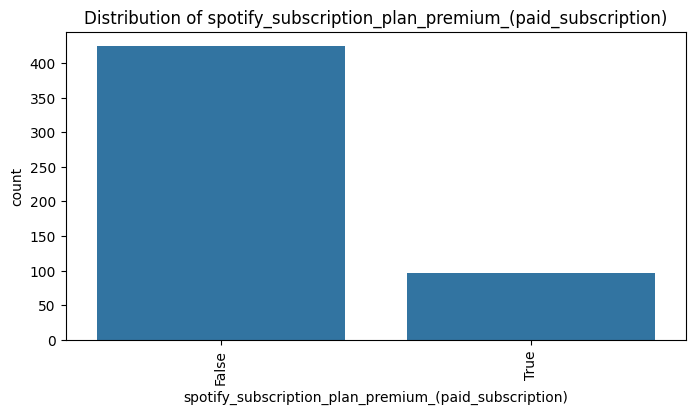

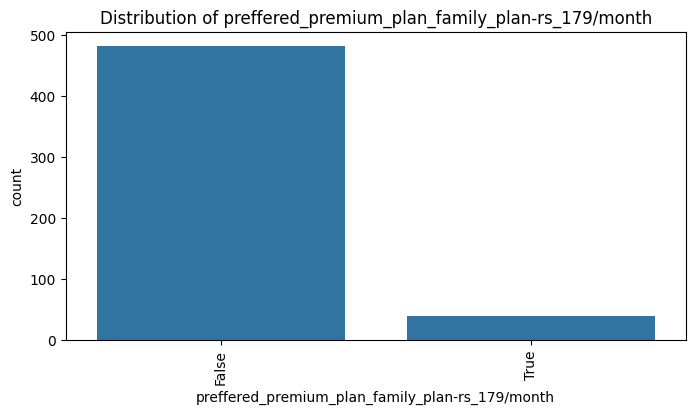

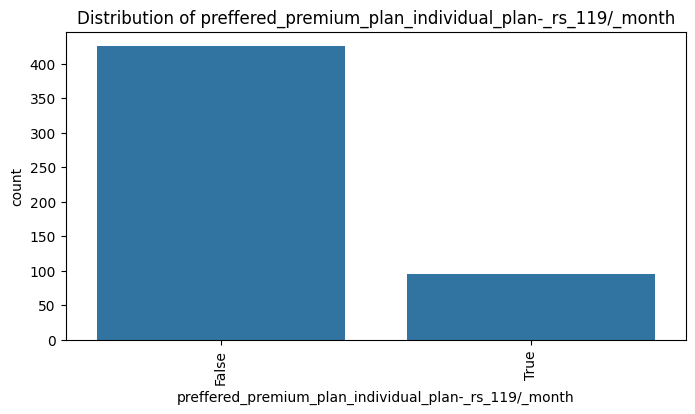

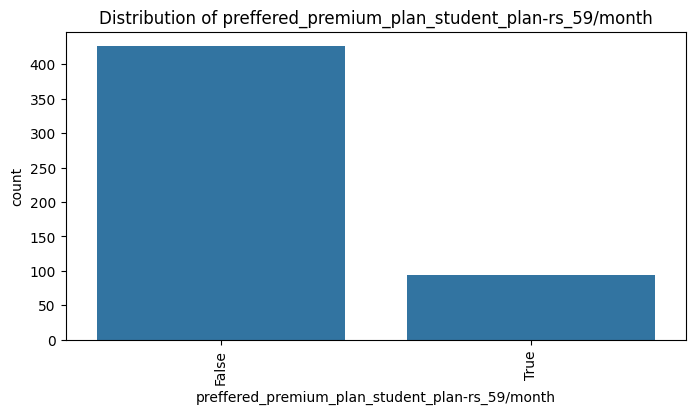

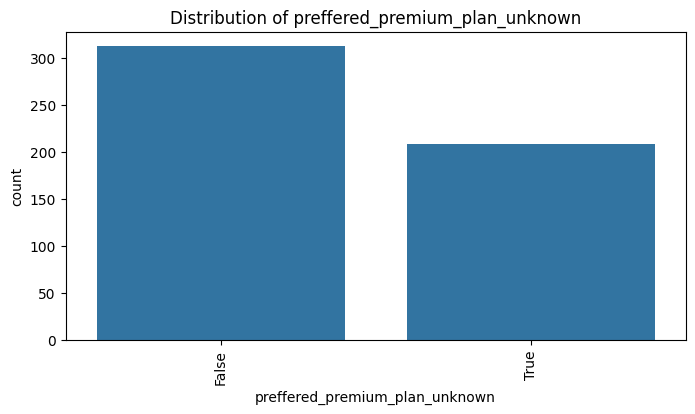

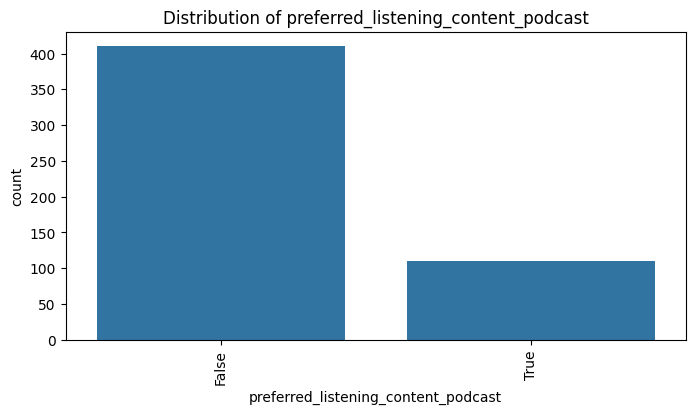

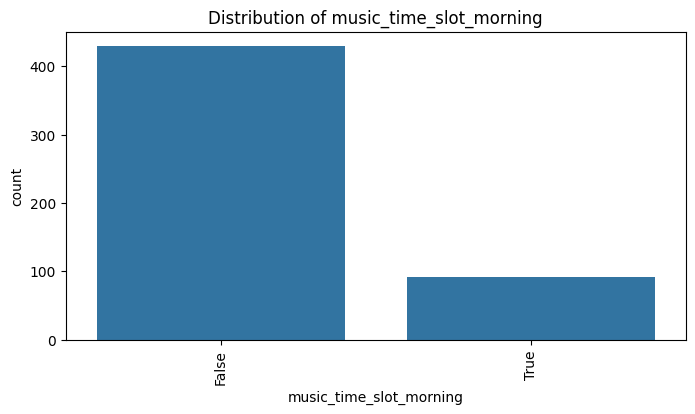

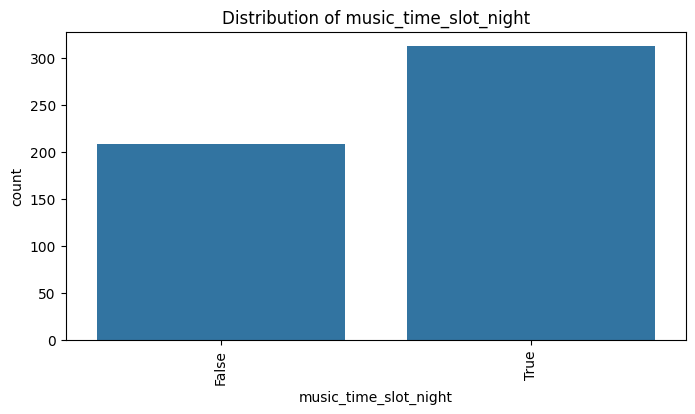

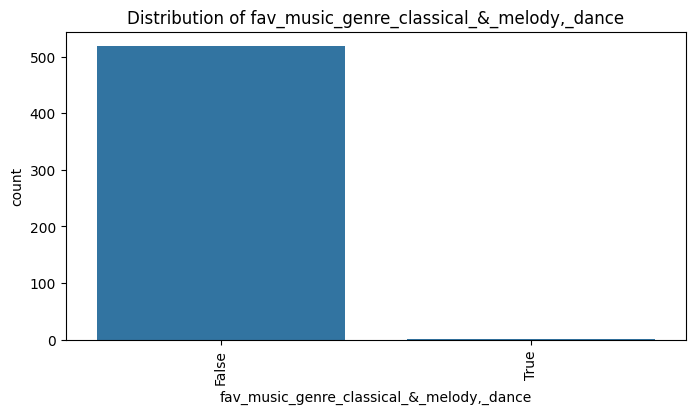

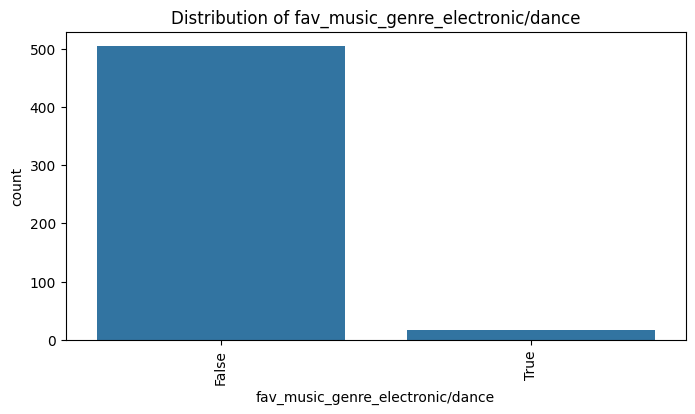

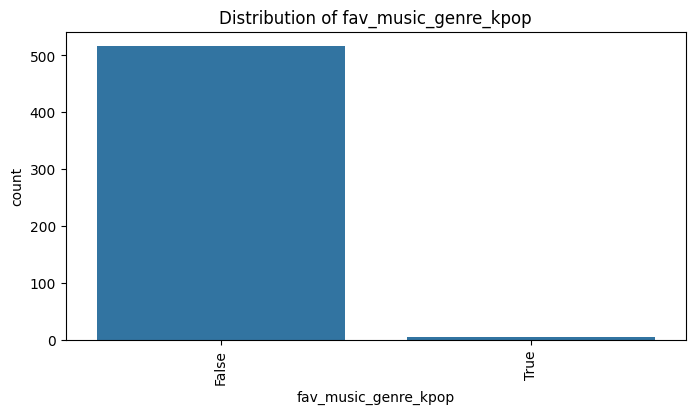

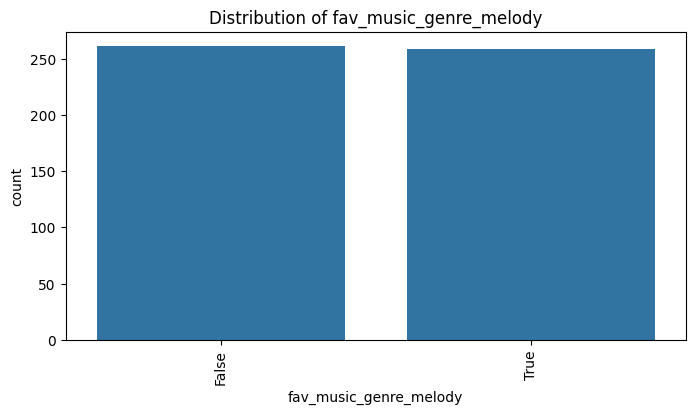

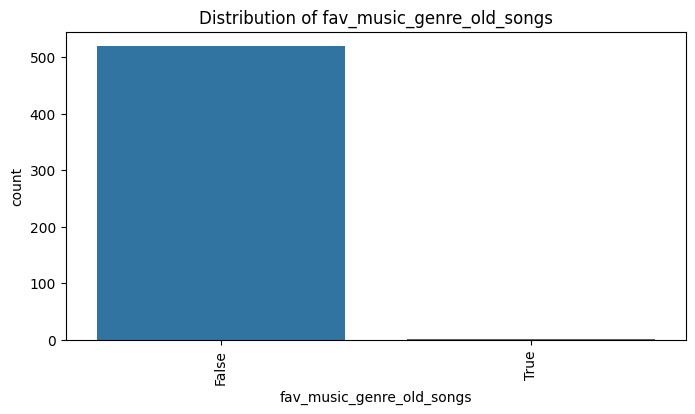

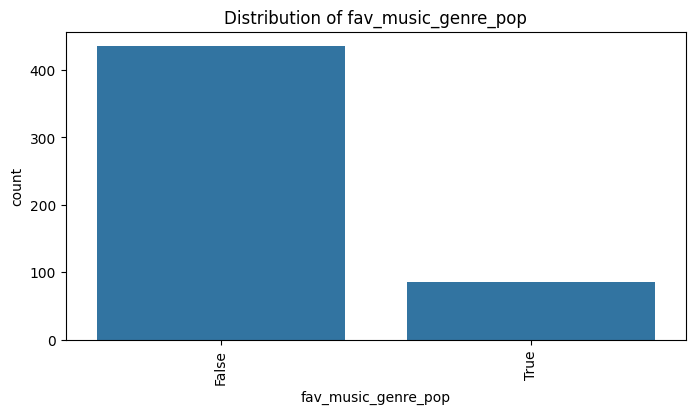

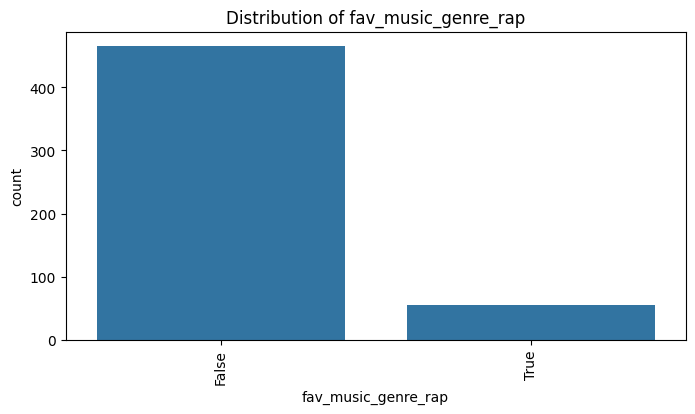

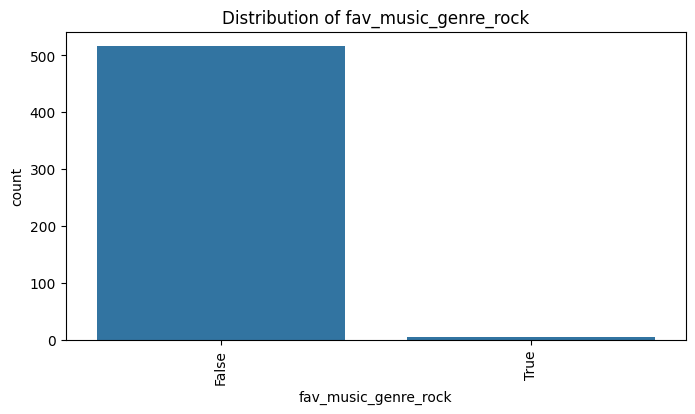

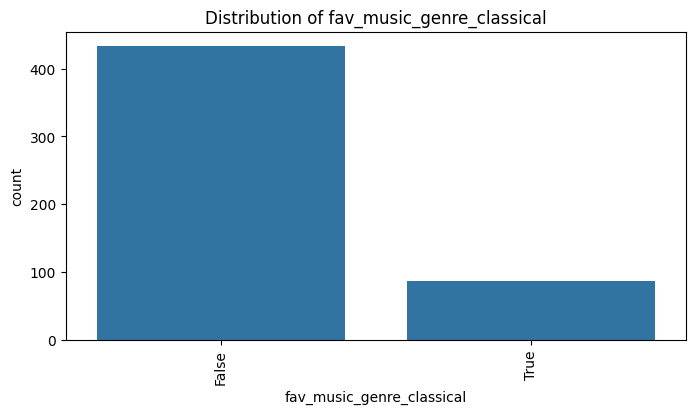

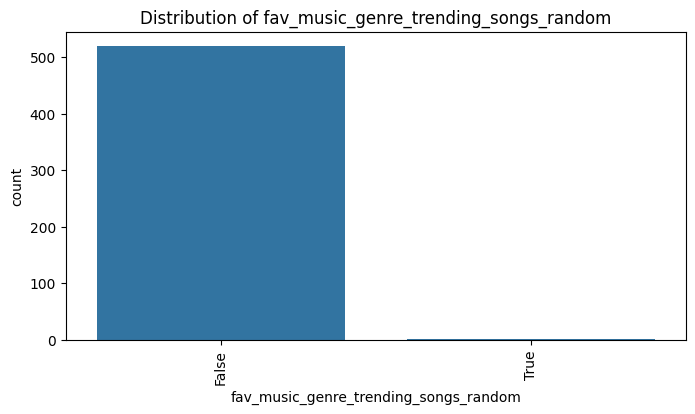

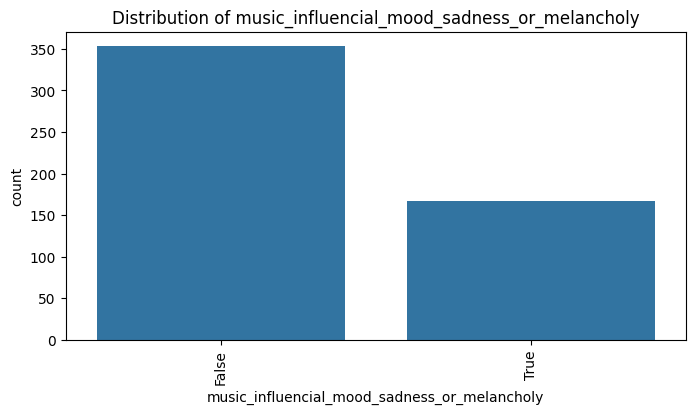

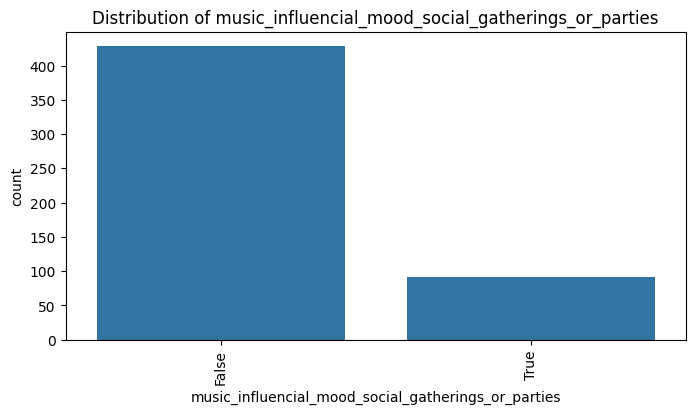

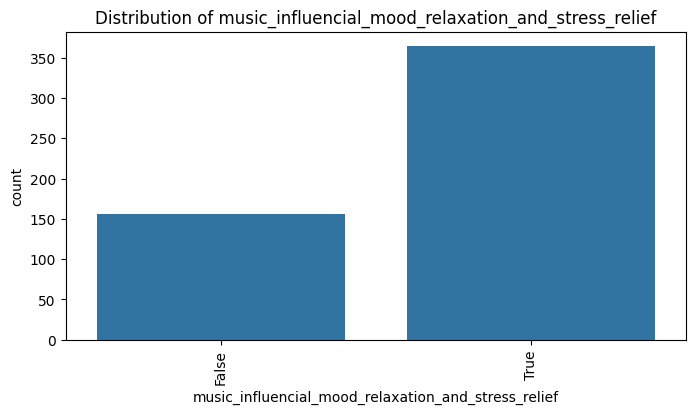

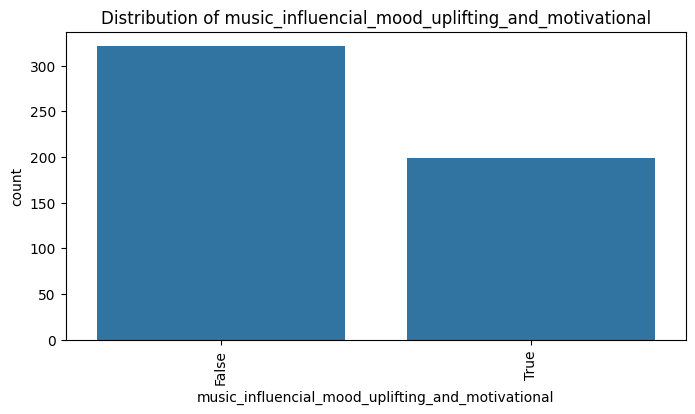

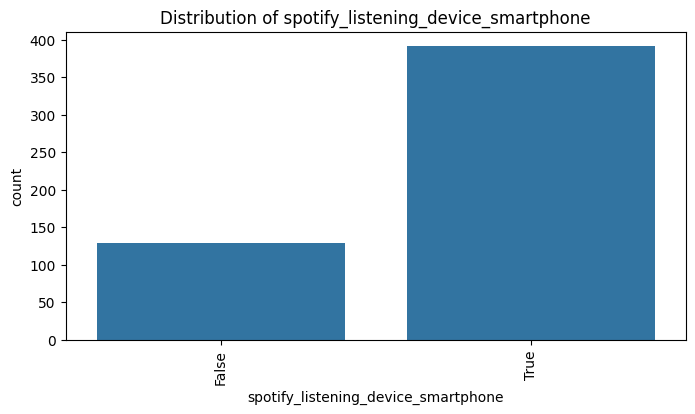

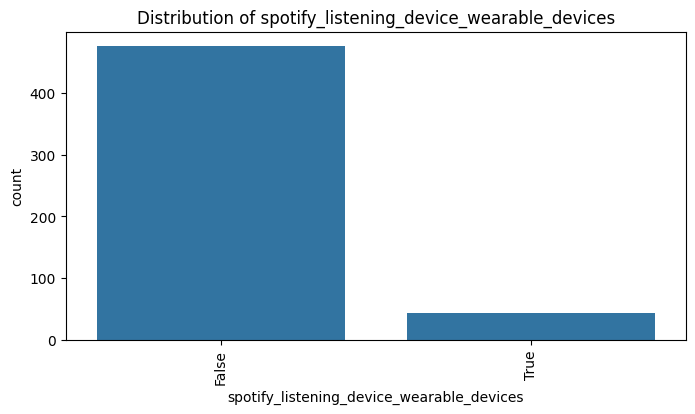

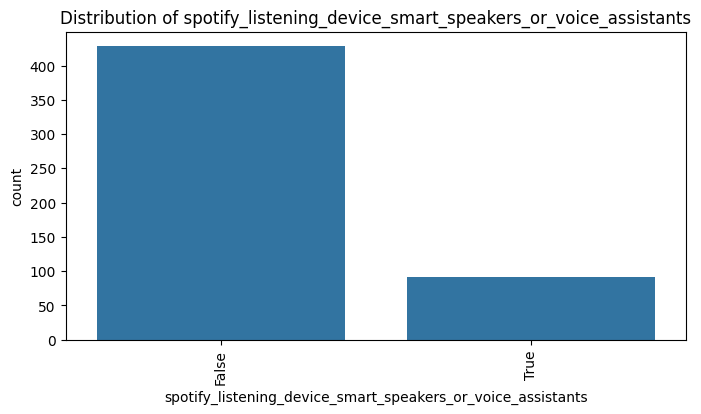

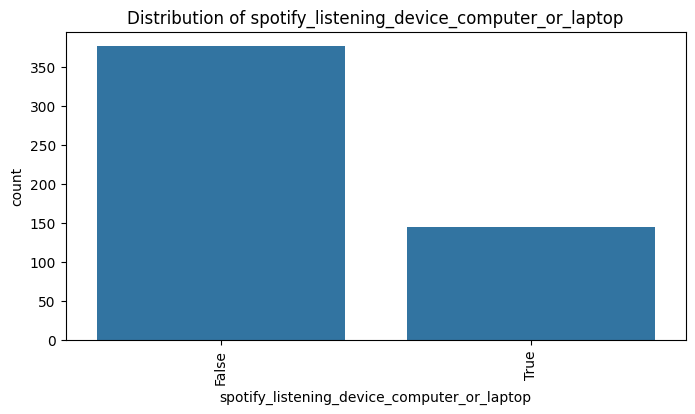

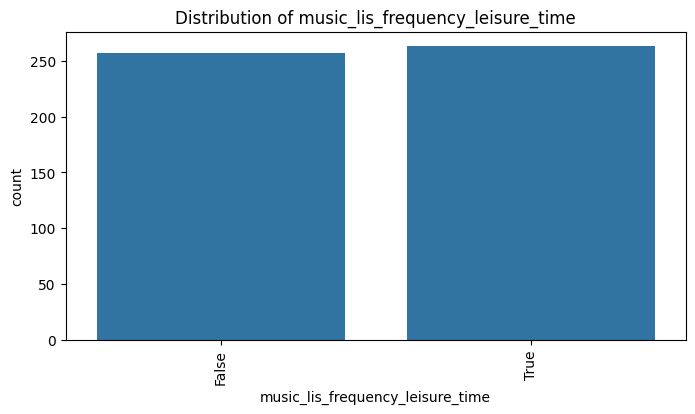

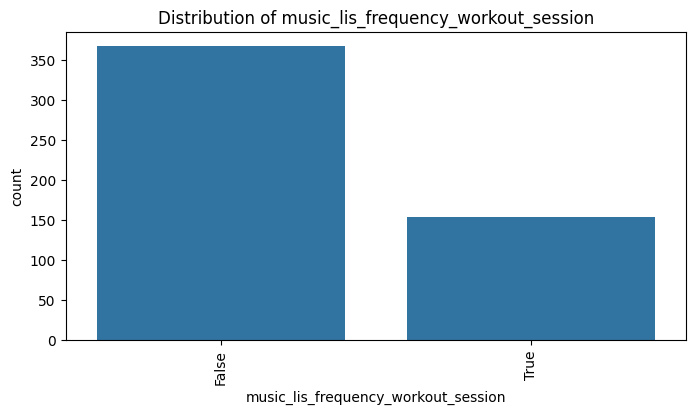

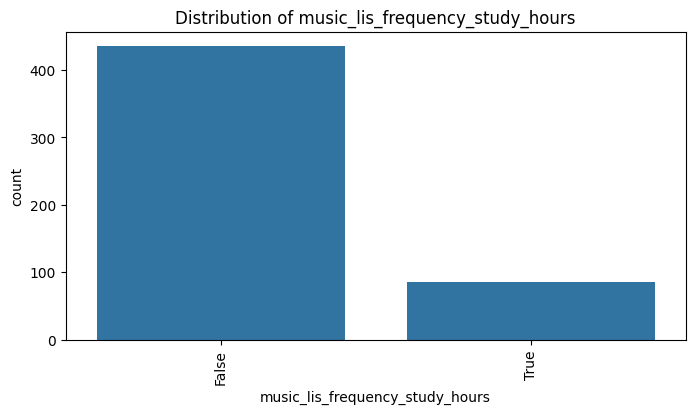

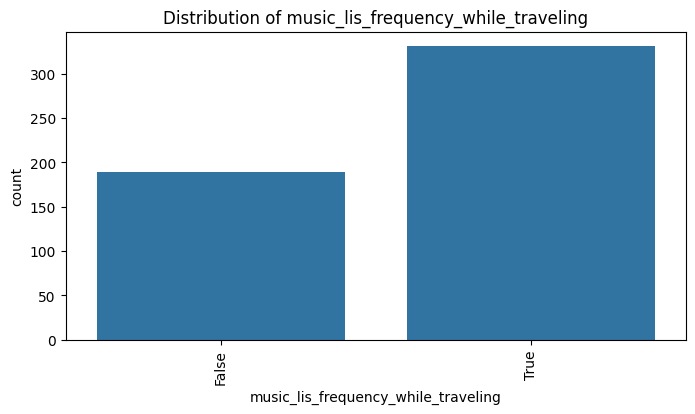

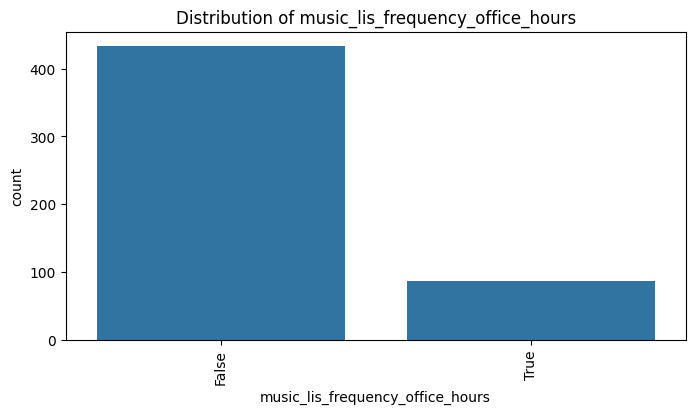

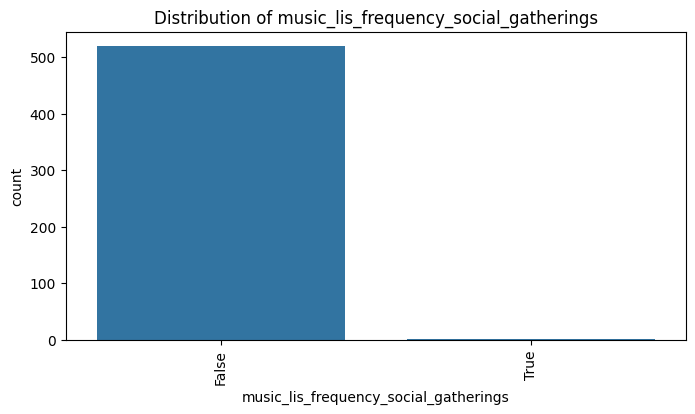

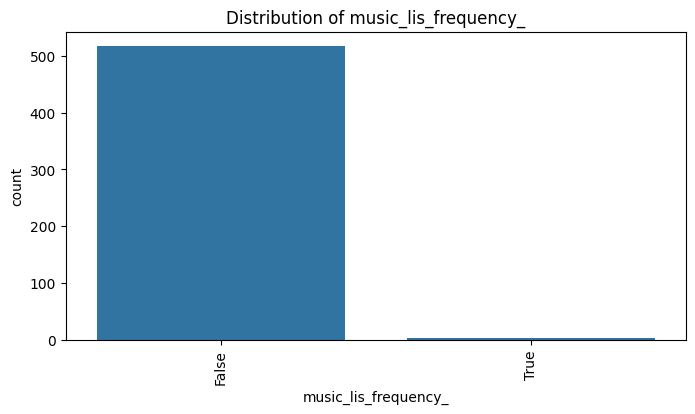

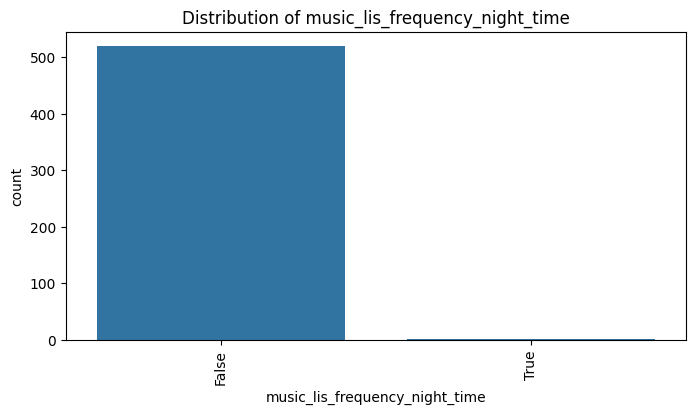

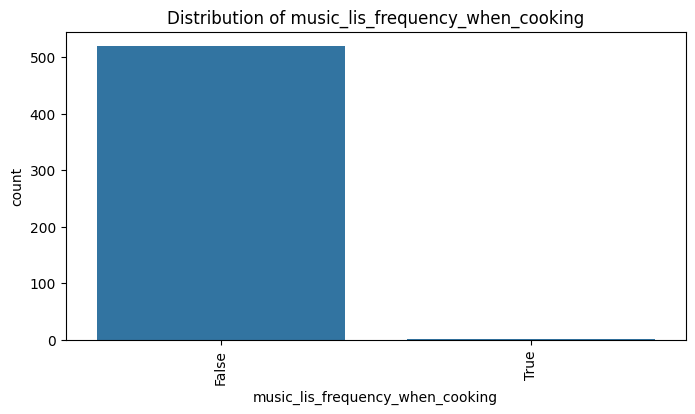

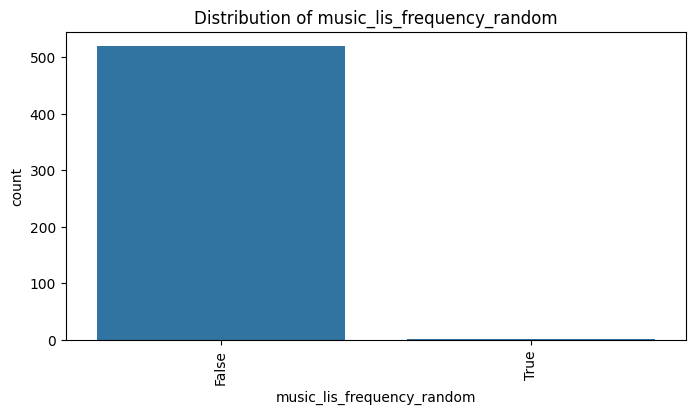

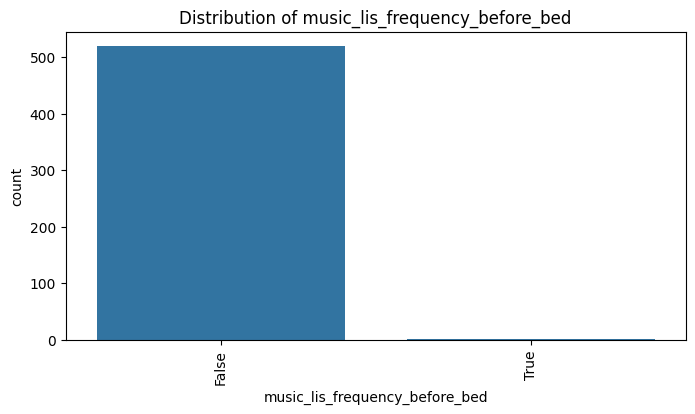

In [ ]:
# Bar plots for categorical features
cat_cols = df.columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
df.columns

Index(['age', 'music_expl_method', 'music_recc_rating', 'pod_lis_frequency',
       'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference',
       'preffered_pod_duration', 'pod_variety_satisfaction', 'age_group',
       'is_premium', 'pod_lis_frequency_num', 'gender_male', 'gender_others',
       'spotify_usage_period_6_months_to_1_year',
       'spotify_usage_period_less_than_6_months',
       'spotify_usage_period_more_than_2_years', 'premium_sub_willingness_yes',
       'spotify_subscription_plan_premium_(paid_subscription)',
       'preffered_premium_plan_family_plan-rs_179/month',
       'preffered_premium_plan_individual_plan-_rs_119/_month',
       'preffered_premium_plan_student_plan-rs_59/month',
       'preffered_premium_plan_unknown', 'preferred_listening_content_podcast',
       'music_time_slot_morning', 'music_time_slot_night',
       'fav_music_genre_classical_&_melody,_dance',
       'fav_music_genre_electronic/dance', 'fav_music_genre_kpop',
       'fav_music_

In [ ]:
from sklearn.preprocessing import LabelEncoder

# convert categorical values into numerical with OHE
df_dropped = df.drop(columns = ['is_premium', 'spotify_subscription_plan_premium_(paid_subscription)'])
df_encoded = pd.get_dummies(df_dropped, drop_first=True)

df_encoded.head(10)

,music_recc_rating,pod_lis_frequency_num,gender_male,gender_others,spotify_usage_period_6_months_to_1_year,spotify_usage_period_less_than_6_months,spotify_usage_period_more_than_2_years,premium_sub_willingness_yes,preffered_premium_plan_family_plan-rs_179/month,preffered_premium_plan_individual_plan-_rs_119/_month,...,pod_host_preference_unknown Podcasters,preffered_pod_duration_Longer,preffered_pod_duration_Shorter,preffered_pod_duration_Unknown,pod_variety_satisfaction_Ok,pod_variety_satisfaction_Satisfied,pod_variety_satisfaction_Very Dissatisfied,pod_variety_satisfaction_Very Satisfied,age_group_20-35,age_group_35-60
0,3,4,False,False,False,False,True,True,True,False,...,False,False,False,False,True,False,False,False,True,False
1,2,3,True,False,False,False,True,True,False,True,...,False,False,False,True,False,True,False,False,False,False
2,4,2,False,True,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,4,0,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
4,4,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5,3,0,True,False,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,True,False
6,3,0,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
7,5,3,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
8,4,1,False,False,False,True,False,True,False,True,...,False,False,True,False,False,True,False,False,True,False
9,4,0,False,False,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,True,False


In [ ]:
df_encoded.columns

Index(['music_recc_rating', 'pod_lis_frequency_num', 'gender_male',
       'gender_others', 'spotify_usage_period_6_months_to_1_year',
       'spotify_usage_period_less_than_6_months',
       'spotify_usage_period_more_than_2_years', 'premium_sub_willingness_yes',
       'preffered_premium_plan_family_plan-rs_179/month',
       'preffered_premium_plan_individual_plan-_rs_119/_month',
       ...
       'pod_host_preference_unknown Podcasters',
       'preffered_pod_duration_Longer', 'preffered_pod_duration_Shorter',
       'preffered_pod_duration_Unknown', 'pod_variety_satisfaction_Ok',
       'pod_variety_satisfaction_Satisfied',
       'pod_variety_satisfaction_Very Dissatisfied',
       'pod_variety_satisfaction_Very Satisfied', 'age_group_20-35',
       'age_group_35-60'],
      dtype='object', length=106)

In [ ]:
# feature importance with Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# separate features and subscription plan
X = df_encoded
y = df['is_premium']

# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# predict on the test set
y_pred = rf.predict(X_test)

# evaluate model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        82
           1       0.20      0.05      0.07        22

    accuracy                           0.76       104
   macro avg       0.49      0.50      0.47       104
weighted avg       0.66      0.76      0.70       104



In [ ]:
# get feature importances
importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                              Feature  Importance
7                         premium_sub_willingness_yes    0.076454
9   preffered_premium_plan_individual_plan-_rs_119...    0.050173
0                                   music_recc_rating    0.042797
1                               pod_lis_frequency_num    0.026424
31  spotify_listening_device_smart_speakers_or_voi...    0.026040
..                                                ...         ...
83  fav_pod_genre_Political, informative, topics t...    0.000000
50             music_expl_method_Others, Social media    0.000000
79                    fav_pod_genre_Informative stuff    0.000000
77                   fav_pod_genre_General knowledge     0.000000
85             fav_pod_genre_Spiritual and devotional    0.000000

[106 rows x 2 columns]


In [ ]:
# separate features and subscription plan
top_features = feature_importance_df.head(5)['Feature'].tolist()
X2 = df_encoded[top_features]
y2 = df['is_premium']

# split dataset into train and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# train random forest model
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_train2, y_train2)

# predict on the test set
y_pred2 = rf2.predict(X_test2)

# evaluate model performance
print(f"Accuracy: {accuracy_score(y_test2, y_pred2):.2f}")
print(classification_report(y_test2, y_pred2))

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        82
           1       0.43      0.27      0.33        22

    accuracy                           0.77       104
   macro avg       0.63      0.59      0.60       104
weighted avg       0.74      0.77      0.75       104



In [ ]:
from sklearn.model_selection import GridSearchCV

# parameter grid
param_grid = {
    "n_estimators": [1200, 1500, 1700],
    "min_samples_split": [10, 12, 15],
    "min_samples_leaf": [1, 2],
    "max_depth": [10, 14, 17, 19],
}

# GridSearchCV to optimize hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train2, y_train2)

# best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 1200}


In [ ]:
# train model with best parameters
optimized_rf = grid_search.best_estimator_

# predict with optimized model
optimized_y_pred = optimized_rf.predict(X_test2)
print(f"Optimized Accuracy: {accuracy_score(y_test2, optimized_y_pred):.2f}")
print(classification_report(y_test2, optimized_y_pred))

Optimized Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        82
           1       0.40      0.18      0.25        22

    accuracy                           0.77       104
   macro avg       0.60      0.55      0.56       104
weighted avg       0.72      0.77      0.73       104



In [ ]:
# parameter grid
param_grid = {
    "n_estimators": [1200, 1500, 1700],
    "min_samples_split": [10, 12, 15],
    "min_samples_leaf": [1, 2],
    "max_depth": [10, 14, 17, 19],
}

# GridSearchCV to optimize hyperparameters for all features dataset
grid_search = GridSearchCV(rf, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 1200}


In [ ]:
# train model with best parameters
optimized_rf2 = grid_search.best_estimator_

# predict with optimized model
optimized_y_pred2 = optimized_rf2.predict(X_test)
print(f"Optimized Accuracy: {accuracy_score(y_test, optimized_y_pred2):.2f}")
print(classification_report(y_test, optimized_y_pred2))

Optimized Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        82
           1       0.00      0.00      0.00        22

    accuracy                           0.77       104
   macro avg       0.39      0.49      0.43       104
weighted avg       0.62      0.77      0.69       104



In [ ]:
importances = optimized_rf2.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df.head())

                                              Feature  Importance
7                         premium_sub_willingness_yes    0.112895
9   preffered_premium_plan_individual_plan-_rs_119...    0.073484
11                     preffered_premium_plan_unknown    0.047826
0                                   music_recc_rating    0.043244
97                      preffered_pod_duration_Longer    0.035939


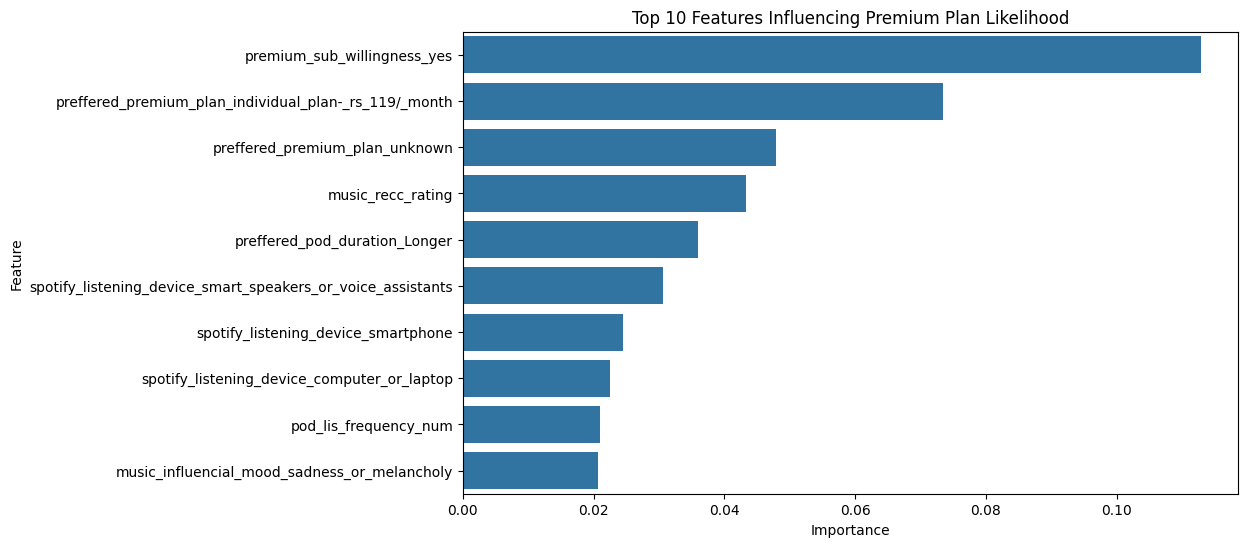

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Features Influencing Premium Plan Likelihood')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Grab original data
dataset_path = kagglehub.dataset_download("meeraajayakumar/spotify-user-behavior-dataset")

print("Path to dataset files:", dataset_path)

# Check if the dataset file exists
excel_file = "Spotify_data.xlsx"
file_path = os.path.join(dataset_path, excel_file)

if os.path.exists(file_path):
    print(f"Excel file found: {file_path}")

    # Load the Excel file
    df = pd.read_excel(file_path)
else:
    print("Error: Excel file not found. Check the dataset directory.")

df.head()


Path to dataset files: /root/.cache/kagglehub/datasets/meeraajayakumar/spotify-user-behavior-dataset/versions/1
Excel file found: /root/.cache/kagglehub/datasets/meeraajayakumar/spotify-user-behavior-dataset/versions/1/Spotify_data.xlsx


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [ ]:
df.columns

Index(['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preffered_premium_plan', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_Influencial_mood',
       'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
       'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
       'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')

In [ ]:
# Data Cleaning

missing_values = df.isnull().sum() / len(df) * 100
print(missing_values)

for column in df.columns: # Find out what type of data and unique values we have
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Age                             0.000000
Gender                          0.000000
spotify_usage_period            0.000000
spotify_listening_device        0.000000
spotify_subscription_plan       0.000000
premium_sub_willingness         0.000000
preffered_premium_plan         40.000000
preferred_listening_content     0.000000
fav_music_genre                 0.000000
music_time_slot                 0.000000
music_Influencial_mood          0.000000
music_lis_frequency             0.000000
music_expl_method               0.000000
music_recc_rating               0.000000
pod_lis_frequency               0.000000
fav_pod_genre                  28.461538
preffered_pod_format           26.923077
pod_host_preference            27.115385
preffered_pod_duration         24.807692
pod_variety_satisfaction        0.000000
dtype: float64
Unique values in 'Age': ['20-35' '12-20' '35-60' '6-12' '60+']
Unique values in 'Gender': ['Female' 'Male' 'Others']
Unique values in 'spotify_usage_period': ['More 

In [ ]:
subscription_plan_mapping = {
    'Free (ad-supported)': 0,
    'Premium (paid subscription)': 1
}
df['premium_subscription'] = df['spotify_subscription_plan'].map(subscription_plan_mapping)
df = df.drop('spotify_subscription_plan', axis=1)


sub_willingness_mapping = {
    'Yes': 1,
    'No': 0
}
df['premium_sub_willingness'] = df['premium_sub_willingness'].map(sub_willingness_mapping)

pod_lis_frequency_mapping = {
    'Never': 0,
    'Rarely': 1,
    'Once a week': 2,
    'Several times a week': 3,
    'Daily': 4
}

df['pod_lis_frequency'] = df['pod_lis_frequency'].map(pod_lis_frequency_mapping)

pod_variety_satisfaction_mapping = {
    'Very Dissatisfied': -2,
    'Dissatisfied': -1,
    'Ok': 0,
    'Satisfied': 1,
    'Very Satisfied': 2
}
df['pod_variety_satisfaction'] = df['pod_variety_satisfaction'].map(pod_variety_satisfaction_mapping)

def categorize_device(device_string):
    if ', ' in device_string:
        return 'multi-device'
    else:
        return device_string

df['spotify_listening_device'] = df['spotify_listening_device'].apply(categorize_device)


In [ ]:
premium_subscribers = df[df['premium_subscription'] == 1]
willingness_to_continue = premium_subscribers['premium_sub_willingness'].value_counts()
print(willingness_to_continue)

premium_sub_willingness
1    72
0    24
Name: count, dtype: int64


In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

df = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(encoded_df.columns.union(binary_cols))

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

categorical_cols = premium_subscribers.select_dtypes(include=['object', 'category']).columns
binary_cols = [col for col in premium_subscribers.columns if premium_subscribers[col].nunique() == 2]

encoder = OneHotEncoder(sparse_output=False)

encoded_data_premium_subscribers = encoder.fit_transform(premium_subscribers[categorical_cols])

encoded_premium_subscribers = pd.DataFrame(encoded_data_premium_subscribers, columns=encoder.get_feature_names_out(categorical_cols))

premium_subscribers = pd.concat([premium_subscribers.drop(categorical_cols, axis=1), encoded_premium_subscribers], axis=1)

numerical_cols = premium_subscribers.select_dtypes(include=['int64', 'float64']).columns.difference(encoded_premium_subscribers.columns.union(binary_cols))

scaler = StandardScaler()
premium_subscribers[numerical_cols] = scaler.fit_transform(premium_subscribers[numerical_cols])


In [ ]:
# Selecting features - make sure to exclude the target variable
feature_columns = [col for col in df.columns if col != 'premium_sub_willingness']
X = df[feature_columns]

y = df['premium_sub_willingness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=500)

log_reg.fit(X_train, y_train)

log_pred = log_reg.predict(X_test)

log_acc = accuracy_score(y_test, log_pred)

cm_log = confusion_matrix(y_test, log_pred)
tn_log, fp_log, fn_log, tp_log = cm_log.ravel()

log_TPR = tp_log / (tp_log + fn_log)
log_FPR = fp_log / (fp_log + tn_log)

log_PRE = precision_score(y_test, log_pred)

log_acc

0.7884615384615384

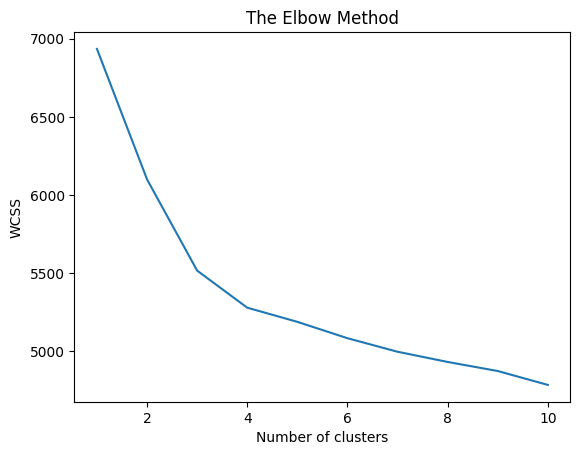

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df)

df['Cluster'] = clusters

Silhouette Score for k=2: 0.12791429993293219
Silhouette Score for k=3: 0.1605800279817623
Silhouette Score for k=4: 0.12053858512578704
Silhouette Score for k=5: 0.10557537702077971
Silhouette Score for k=6: 0.07811455843382034
Silhouette Score for k=7: 0.07597577452934351
Silhouette Score for k=8: 0.05600928336562136
Silhouette Score for k=9: 0.053426468676582205
Silhouette Score for k=10: 0.05420486336457123
Silhouette Score for k=11: 0.05141680860928165
Silhouette Score for k=12: 0.048774489480519864
Silhouette Score for k=13: 0.04853823593870392
Silhouette Score for k=14: 0.04382177877060684


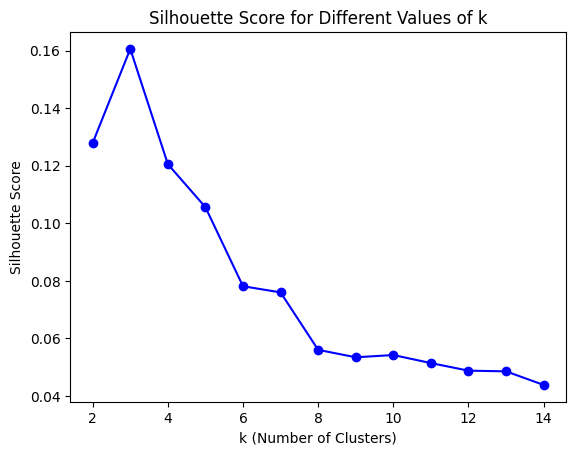

In [ ]:
silhouette_scores = []
K = range(2, 15)  # silhouette score is not defined for k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for k={k}: {silhouette_avg}")
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

# Decision Tree Algorithm

---



In [ ]:
#decision tree algorithm

# Assuming your DataFrame is named df
X = df.drop(['premium_sub_willingness'], axis=1)
y = df['premium_sub_willingness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Display the top 10 most relevant features
print(top_features)


feature_columns = [col for col in df.columns if col != 'premium_sub_willingness']
feature_columns_age = ['Age_12-20', 'Age_20-35', 'Age_35-60', 'Age_6-12', 'Age_60+']
ft_col_test = [col for col in top_features['Feature']]
feat_col = ['Cluster', 'pod_lis_frequency', 'music_lis_frequency_While Traveling','music_lis_frequency_Office hours',
            'music_lis_frequency_Social gatherings ', 'music_lis_frequency_Study Hours','music_lis_frequency_Workout session', 'music_lis_frequency_leisure time']
feature_columns


                                              Feature  Importance
25                         preffered_premium_plan_nan    0.310313
16        spotify_listening_device_Computer or laptop    0.109401
3                                premium_subscription    0.065392
2                            pod_variety_satisfaction    0.055641
0                                   music_recc_rating    0.043577
50       music_Influencial_mood_Sadness or melancholy    0.038578
83                music_lis_frequency_While Traveling    0.035781
1                                   pod_lis_frequency    0.033912
77  music_lis_frequency_Study Hours, While Traveli...    0.024742
43  music_Influencial_mood_Relaxation and stress r...    0.022693


['music_recc_rating',
 'pod_lis_frequency',
 'pod_variety_satisfaction',
 'premium_subscription',
 'Age_12-20',
 'Age_20-35',
 'Age_35-60',
 'Age_6-12',
 'Age_60+',
 'Gender_Female',
 'Gender_Male',
 'Gender_Others',
 'spotify_usage_period_1 year to 2 years',
 'spotify_usage_period_6 months to 1 year',
 'spotify_usage_period_Less than 6 months',
 'spotify_usage_period_More than 2 years',
 'spotify_listening_device_Computer or laptop',
 'spotify_listening_device_Smart speakers or voice assistants',
 'spotify_listening_device_Smartphone',
 'spotify_listening_device_Wearable devices',
 'spotify_listening_device_multi-device',
 'preffered_premium_plan_Duo plan- Rs 149/month',
 'preffered_premium_plan_Family Plan-Rs 179/month',
 'preffered_premium_plan_Individual Plan- Rs 119/ month',
 'preffered_premium_plan_Student Plan-Rs 59/month',
 'preffered_premium_plan_nan',
 'preferred_listening_content_Music',
 'preferred_listening_content_Podcast',
 'fav_music_genre_All',
 'fav_music_genre_Classi

In [ ]:
# Assuming target variable is 'premium_sub_willingness'

# Separate features (X) and target variable (y)
X = df[ft_col_test]
y = df['premium_sub_willingness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"class report: {class_report}")

Accuracy: 0.7628205128205128
class report:               precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.71      0.57      0.63        56

    accuracy                           0.76       156
   macro avg       0.75      0.72      0.73       156
weighted avg       0.76      0.76      0.76       156



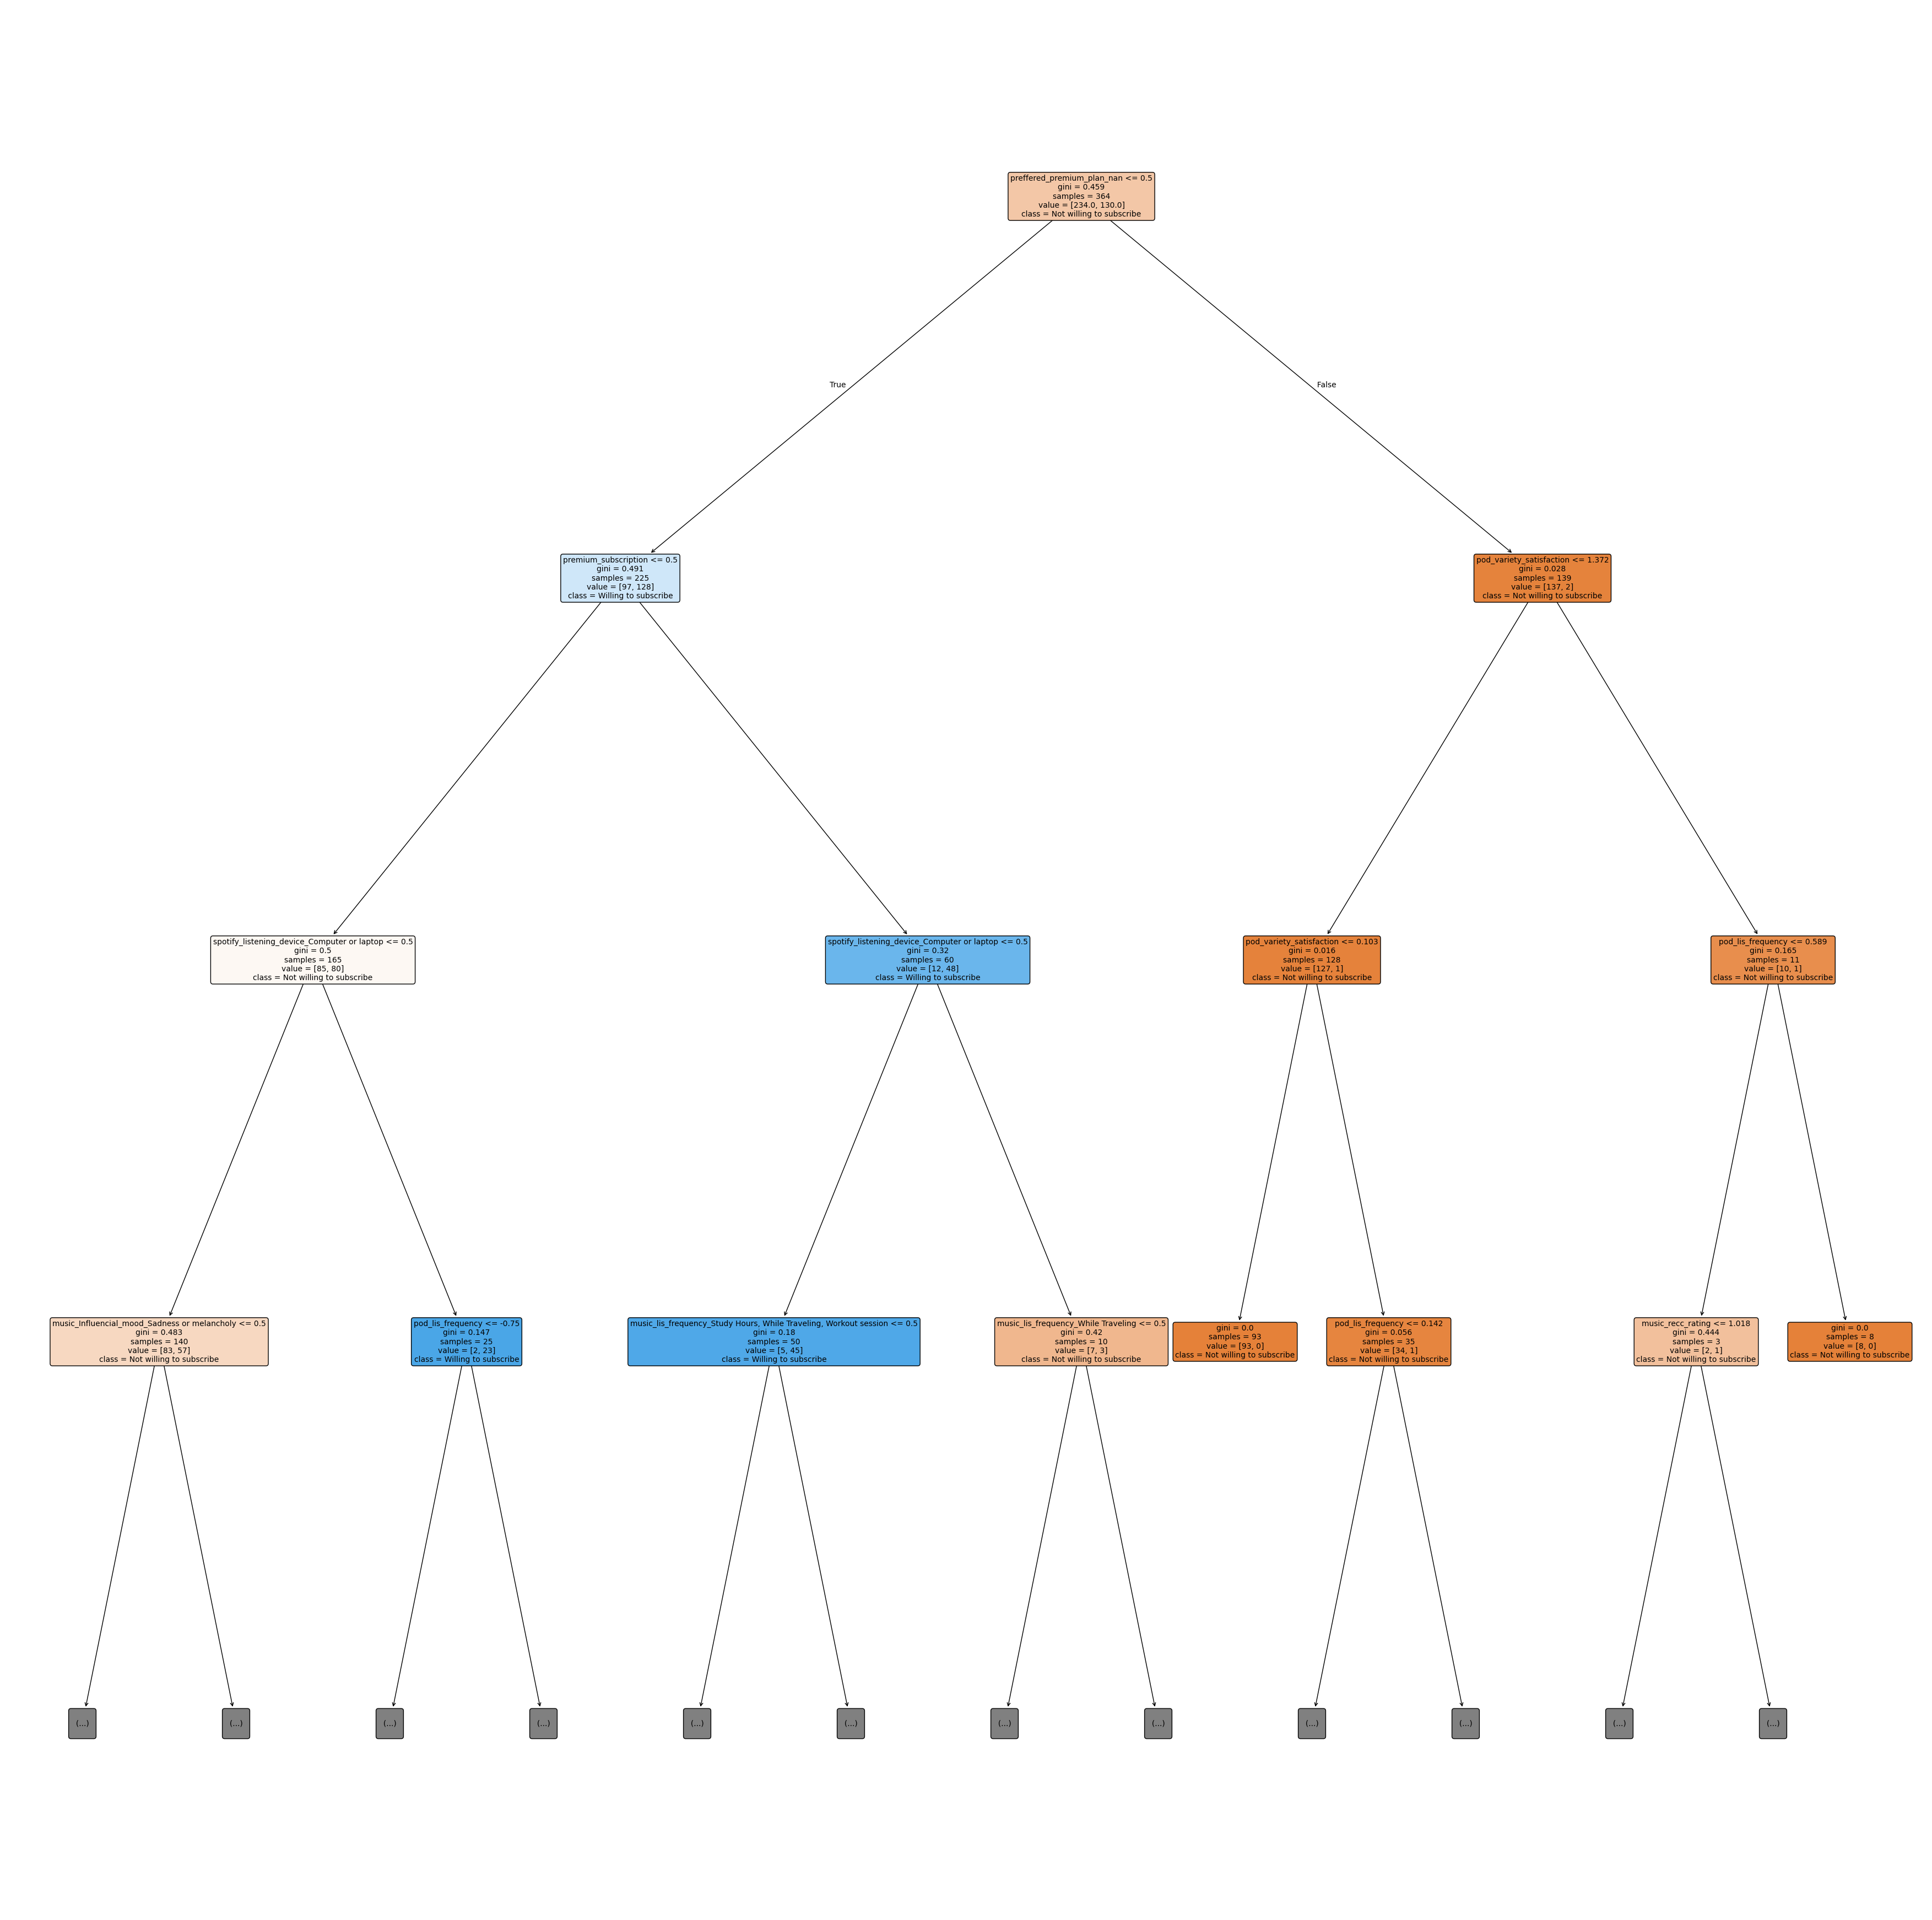

In [ ]:

# Visualize the decision tree using plt
fig, ax = plt.subplots(figsize=(45, 45))
tree.plot_tree(model, fontsize=10, feature_names=X.columns, class_names=['Not willing to subscribe', 'Willing to subscribe'], filled=True, rounded=True, ax=ax, max_depth=3)

plt.show()

